# Prediction Holiday Package
## Kolompok : Analytic Adventurers
## Data Science Batch 46

# Importing Libraries & Data

In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler

import warnings
warnings.filterwarnings('ignore')

In [62]:
df = pd.read_csv('Travel.csv')
df.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


# Exploratory Data Analysis (EDA)

## Desriptive Statistics

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CustomerID                4888 non-null   int64  
 1   ProdTaken                 4888 non-null   int64  
 2   Age                       4662 non-null   float64
 3   TypeofContact             4863 non-null   object 
 4   CityTier                  4888 non-null   int64  
 5   DurationOfPitch           4637 non-null   float64
 6   Occupation                4888 non-null   object 
 7   Gender                    4888 non-null   object 
 8   NumberOfPersonVisiting    4888 non-null   int64  
 9   NumberOfFollowups         4843 non-null   float64
 10  ProductPitched            4888 non-null   object 
 11  PreferredPropertyStar     4862 non-null   float64
 12  MaritalStatus             4888 non-null   object 
 13  NumberOfTrips             4748 non-null   float64
 14  Passport

In [64]:
# mengecek missing value
df.isnull().sum()

CustomerID                    0
ProdTaken                     0
Age                         226
TypeofContact                25
CityTier                      0
DurationOfPitch             251
Occupation                    0
Gender                        0
NumberOfPersonVisiting        0
NumberOfFollowups            45
ProductPitched                0
PreferredPropertyStar        26
MaritalStatus                 0
NumberOfTrips               140
Passport                      0
PitchSatisfactionScore        0
OwnCar                        0
NumberOfChildrenVisiting     66
Designation                   0
MonthlyIncome               233
dtype: int64

In [65]:
#Memisahkan kolom numerik dan kategorikal

nums = df.select_dtypes(include=np.number).columns
cats = df.select_dtypes(exclude=np.number).columns

In [66]:
#Statistik deskriptif untuk kolom numerik
df[nums].describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,4888.0,202443.500000,1411.188388,200000.0,201221.75,202443.5,203665.25,204887.0
ProdTaken,4888.0,0.188216,0.390925,0.0,0.00,0.0,0.00,1.0
Age,4662.0,37.622265,9.316387,18.0,31.00,36.0,44.00,61.0
CityTier,4888.0,1.654255,0.916583,1.0,1.00,1.0,3.00,3.0
DurationOfPitch,4637.0,15.490835,8.519643,5.0,9.00,13.0,20.00,127.0
NumberOfPersonVisiting,4888.0,2.905074,0.724891,1.0,2.00,3.0,3.00,5.0
NumberOfFollowups,4843.0,3.708445,1.002509,1.0,3.00,4.0,4.00,6.0
PreferredPropertyStar,4862.0,3.581037,0.798009,3.0,3.00,3.0,4.00,5.0
NumberOfTrips,4748.0,3.236521,1.849019,1.0,2.00,3.0,4.00,22.0
Passport,4888.0,0.290917,0.454232,0.0,0.00,0.0,1.00,1.0


In [67]:
df[cats].describe()

,TypeofContact,Occupation,Gender,ProductPitched,MaritalStatus,Designation
count,4863,4888,4888,4888,4888,4888
unique,2,4,3,5,4,5
top,Self Enquiry,Salaried,Male,Basic,Married,Executive
freq,3444,2368,2916,1842,2340,1842


In [68]:
#mengklasifikasikan kolom-kolom dalam dataset ke dalam empat tipe

def grab_col_names(dataframe, cat_th=10, car_th=20):
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]
    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and dataframe[col].dtypes != "O"]
    cat_but_num = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and dataframe[col].dtypes == "O"]
    cat_cols = [col for col in cat_cols if col not in cat_but_num]

    # num_cols
    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]
    num_cols = [col for col in num_cols if col not in num_but_cat]


    print(f"Observations: {dataframe.shape[0]}")
    print(f"Variables: {dataframe.shape[1]}")
    print(f'num_cols: {len(num_cols)}')
    print(f'num_but_cat: {len(num_but_cat)}')
    print(f'cat_cols: {len(cat_cols)}')
    print(f'cat_but_car: {len(cat_but_num)}')

    return num_cols, num_but_cat, cat_cols, cat_but_num

In [69]:
num_cols, num_but_cat, cat_cols, cat_but_num  = grab_col_names(df)

Observations: 4888
Variables: 20
num_cols: 5
num_but_cat: 9
cat_cols: 6
cat_but_car: 0


In [70]:
print(f'kolom numerik: {num_cols}')
print(f'kolom kategorik: {cat_cols}')
print(f'kolom numerik tetapi kateorik: {num_but_cat}')
print(f'kolom kategorik tetapi numerik: {cat_but_num}')

kolom numerik: ['CustomerID', 'Age', 'DurationOfPitch', 'NumberOfTrips', 'MonthlyIncome']
kolom kategorik: ['TypeofContact', 'Occupation', 'Gender', 'ProductPitched', 'MaritalStatus', 'Designation']
kolom numerik tetapi kateorik: ['ProdTaken', 'CityTier', 'NumberOfPersonVisiting', 'NumberOfFollowups', 'PreferredPropertyStar', 'Passport', 'PitchSatisfactionScore', 'OwnCar', 'NumberOfChildrenVisiting']
kolom kategorik tetapi numerik: []


* Terdapat 4888 observasi (baris) dan 20 variabel (kolom) dalam dataframe.
Dari 20 variabel tersebut:
* 6 di antaranya adalah kategorikal.
* 5 adalah numerik.
* Tidak ada kolom yang tergolong sebagai kategorikal yang seharusnya numerik (cat_but_car).
* Ada 9 kolom numerik yang memiliki jumlah nilai unik kurang dari batas ambang 10 dan seharusnya kategorikal (num_but_cat).
* Beberapa kolom memiliki missing value, antara lain: Age, TypeofContact, DurationOfPitch, NumberOfFollowups, PreferredPropertyStar, NumberOfTrips, NumberOfChildrenVisiting, dan MonthlyIncome. Namun, hanya kolom-kolom yang akan digunakan dalam pemilihan fitur selanjutnya yang missing value-nya akan ditangani.

## Univariate Analysis

### Target (ProdTaken)

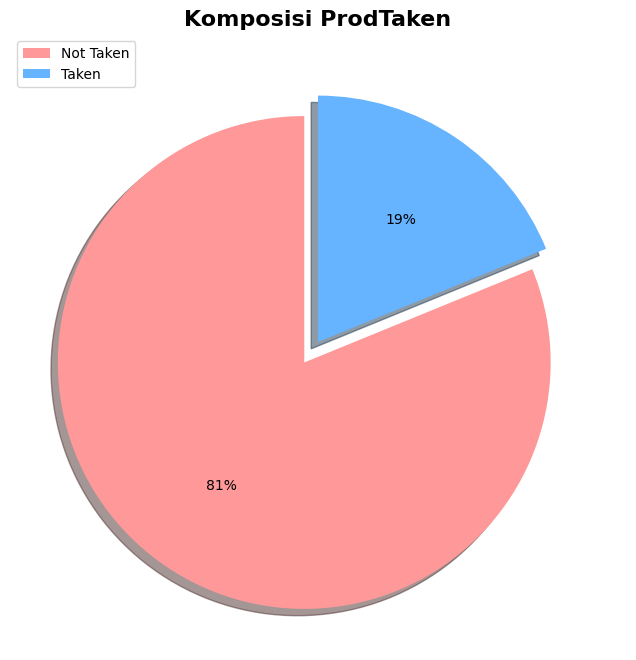

In [71]:
plt.figure(figsize=(8, 8))

# Data
target_counts = df['ProdTaken'].value_counts()

# Mengatur variasi warna dan efek shadow
colors = ['#ff9999', '#66b3ff']
explode = (0.1, 0)

# Pie chart
plt.pie(target_counts, autopct='%1.0f%%', startangle=90, explode=explode, colors=colors, shadow=True)

# Pengaturan lainnya
plt.title('Komposisi ProdTaken', fontsize=16, fontweight='bold')
plt.legend(labels=['Not Taken', 'Taken'], loc='upper left')

plt.show()

Dataset ini memiliki kolom label yang imbalance dengan 81% bervalue Not Taken dan 19% bervalue Taken. Untuk mengatasi imbalance dataset ini, kita akan menggunakan teknik SMOTE (Synthetic Minority Oversampling Technique) untuk menyeimbangkan dataset ini.

### Numerical Features

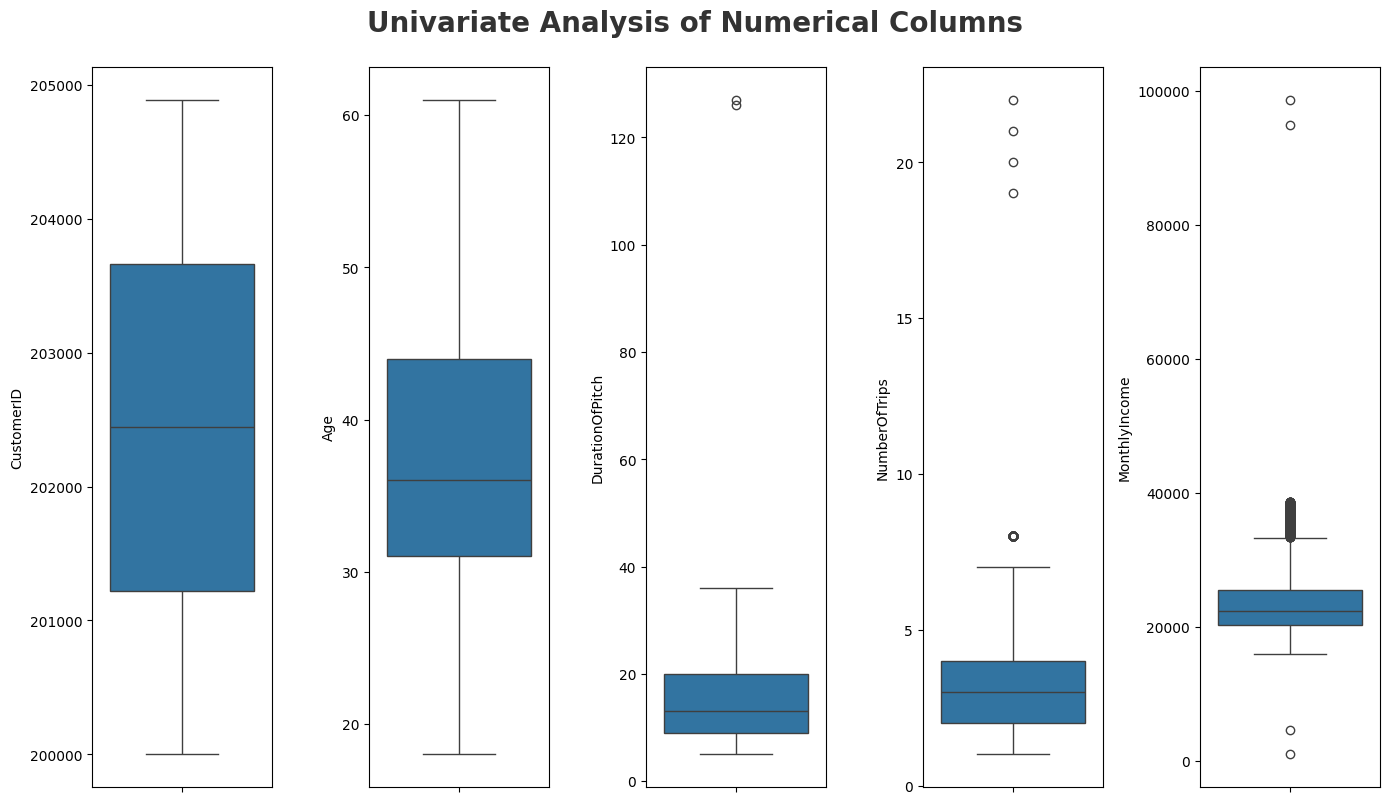

In [72]:
plt.figure(figsize=(14, 8))
for i, col in enumerate(num_cols):
    plt.subplot(1, len(num_cols), i+1)  # Use calculated num_rows
    sns.boxplot(y=df[col])
    plt.ylabel(col)

plt.suptitle('Univariate Analysis of Numerical Columns', fontsize=20, fontweight='bold', alpha=0.8, y=1.)
plt.tight_layout()
plt.show()

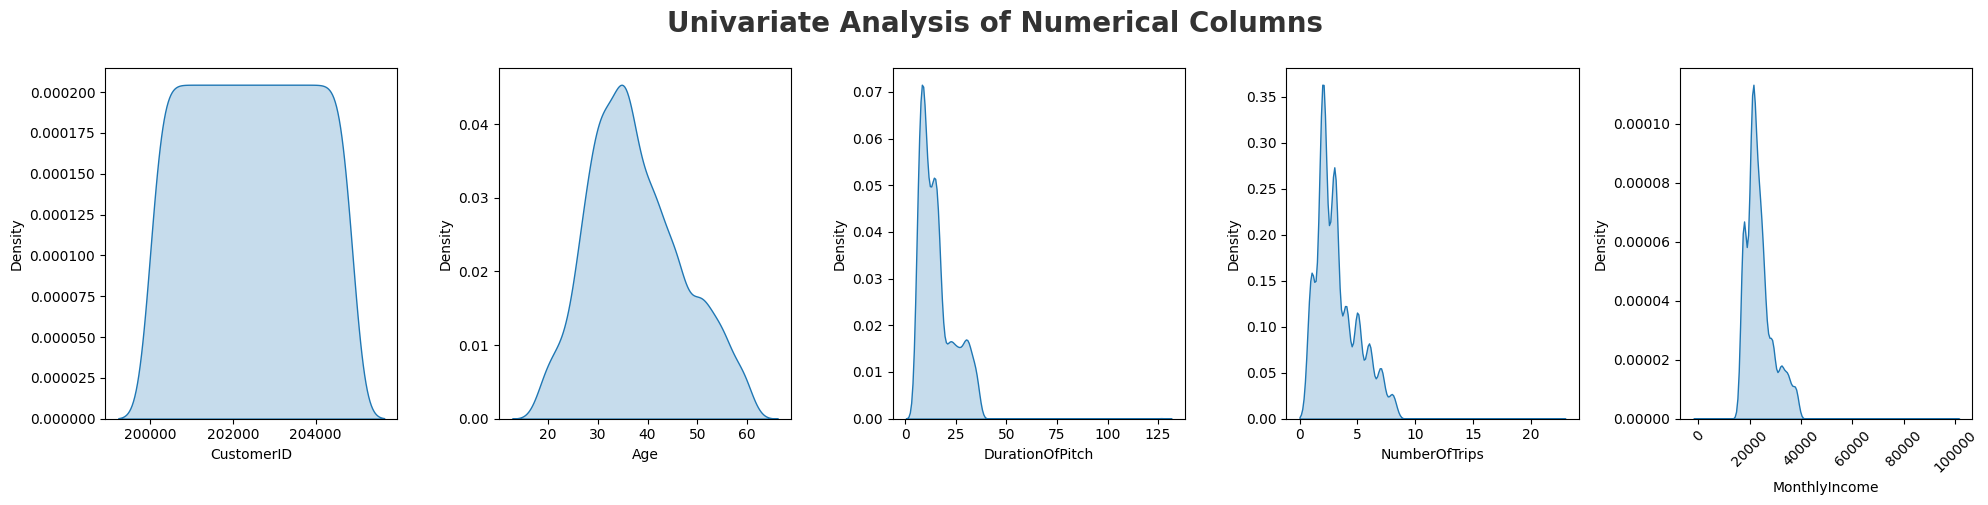

In [73]:
plt.figure(figsize=(20, 5))
for i, col in enumerate(num_cols):
    plt.subplot(1, len(num_cols), i+1)  # Use calculated num_rows
    sns.kdeplot(data=df[col], fill=True)
    plt.xlabel(col)

plt.suptitle('Univariate Analysis of Numerical Columns', fontsize=20, fontweight='bold', alpha=0.8, y=1.)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [74]:
# Check tingkat kemiringan distribusi data numerik dengan skewness score
for i in range(0, len(num_cols)):
    print(f"Skewness {df[num_cols].columns[i]} : {df[num_cols[i]].skew():.3f}")

Skewness CustomerID : 0.000
Skewness Age : 0.383
Skewness DurationOfPitch : 1.752
Skewness NumberOfTrips : 1.454
Skewness MonthlyIncome : 1.949


Kesimpulan:

- Kolom CustomerID memiliki sebaran data yang terlalu banyak sehingga kolom tersebut bisa dihapus nantinya.
- Kolom Age memiliki distribusi yang hampir normal.
- Kolom DurationOfPitch, NumberOfTrips, dan MonthlyIncome sepertinya memiliki distribusi data positive skewed yang mengindikasikan terdapat outlier.
- kolom lain yang sisanya termasuk jenis data diskrit atau ordinal.

### Categorical Features


In [75]:
cat_cols = cat_cols + num_but_cat

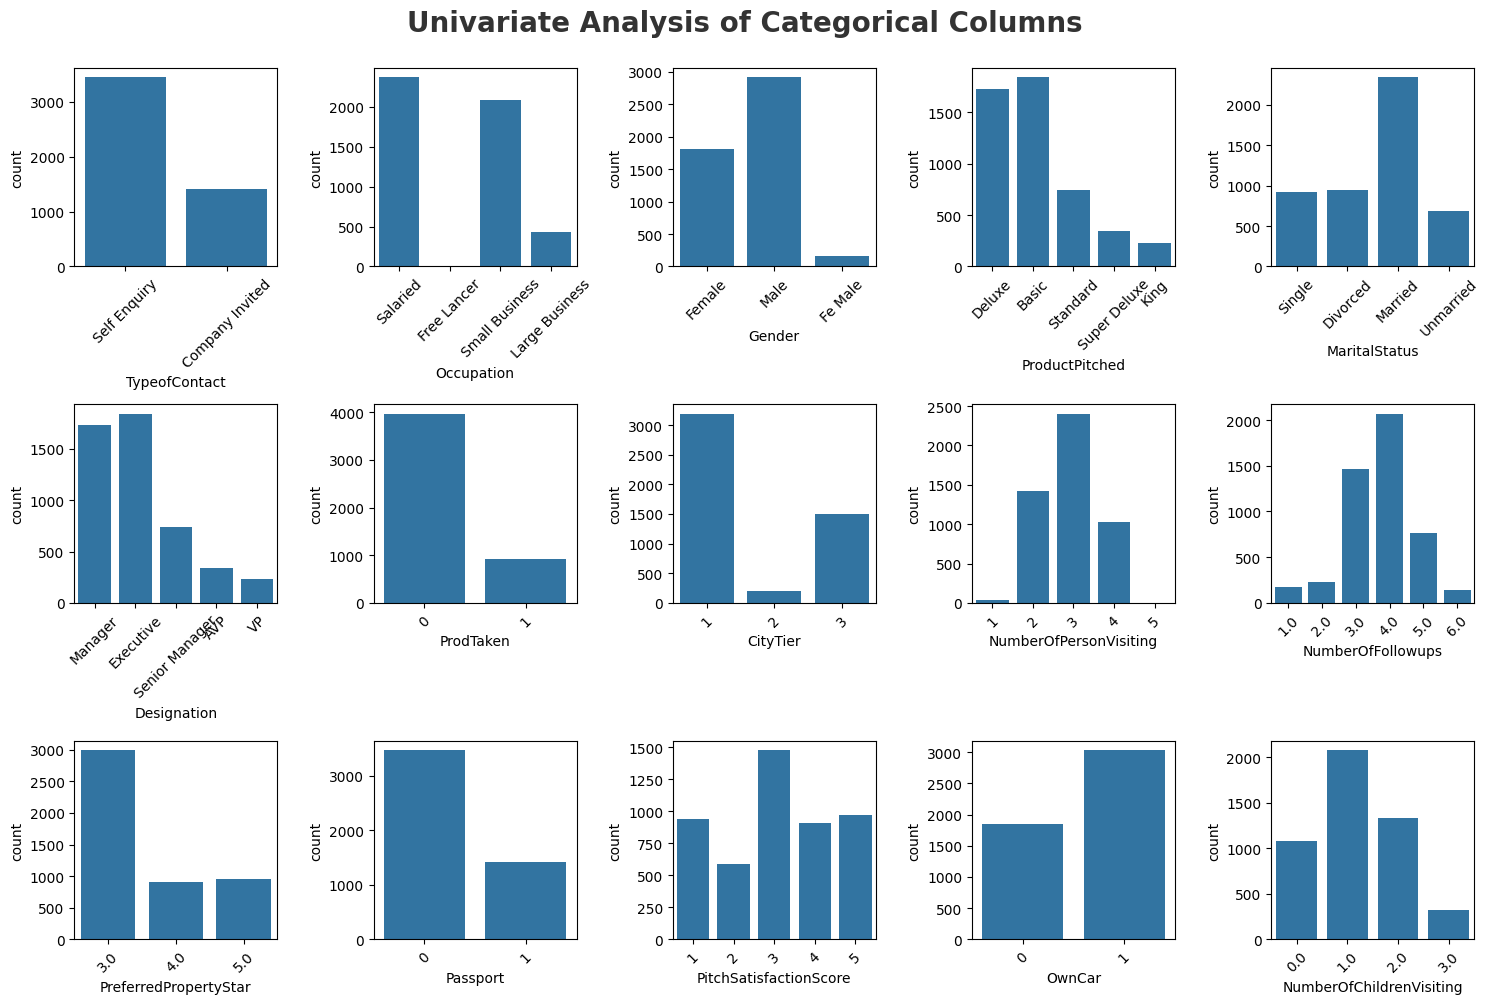

In [76]:
plt.figure(figsize=(15, 10))

for i in range(0, len(cat_cols)):
    plt.subplot(3, 5, i+1)
    sns.countplot(x=df[cat_cols[i]])
    plt.xticks(rotation=45)

plt.suptitle('Univariate Analysis of Categorical Columns', fontsize=20, fontweight='bold', alpha=0.8, y=1.)
plt.tight_layout()
plt.show()

## Bivariate Analysis

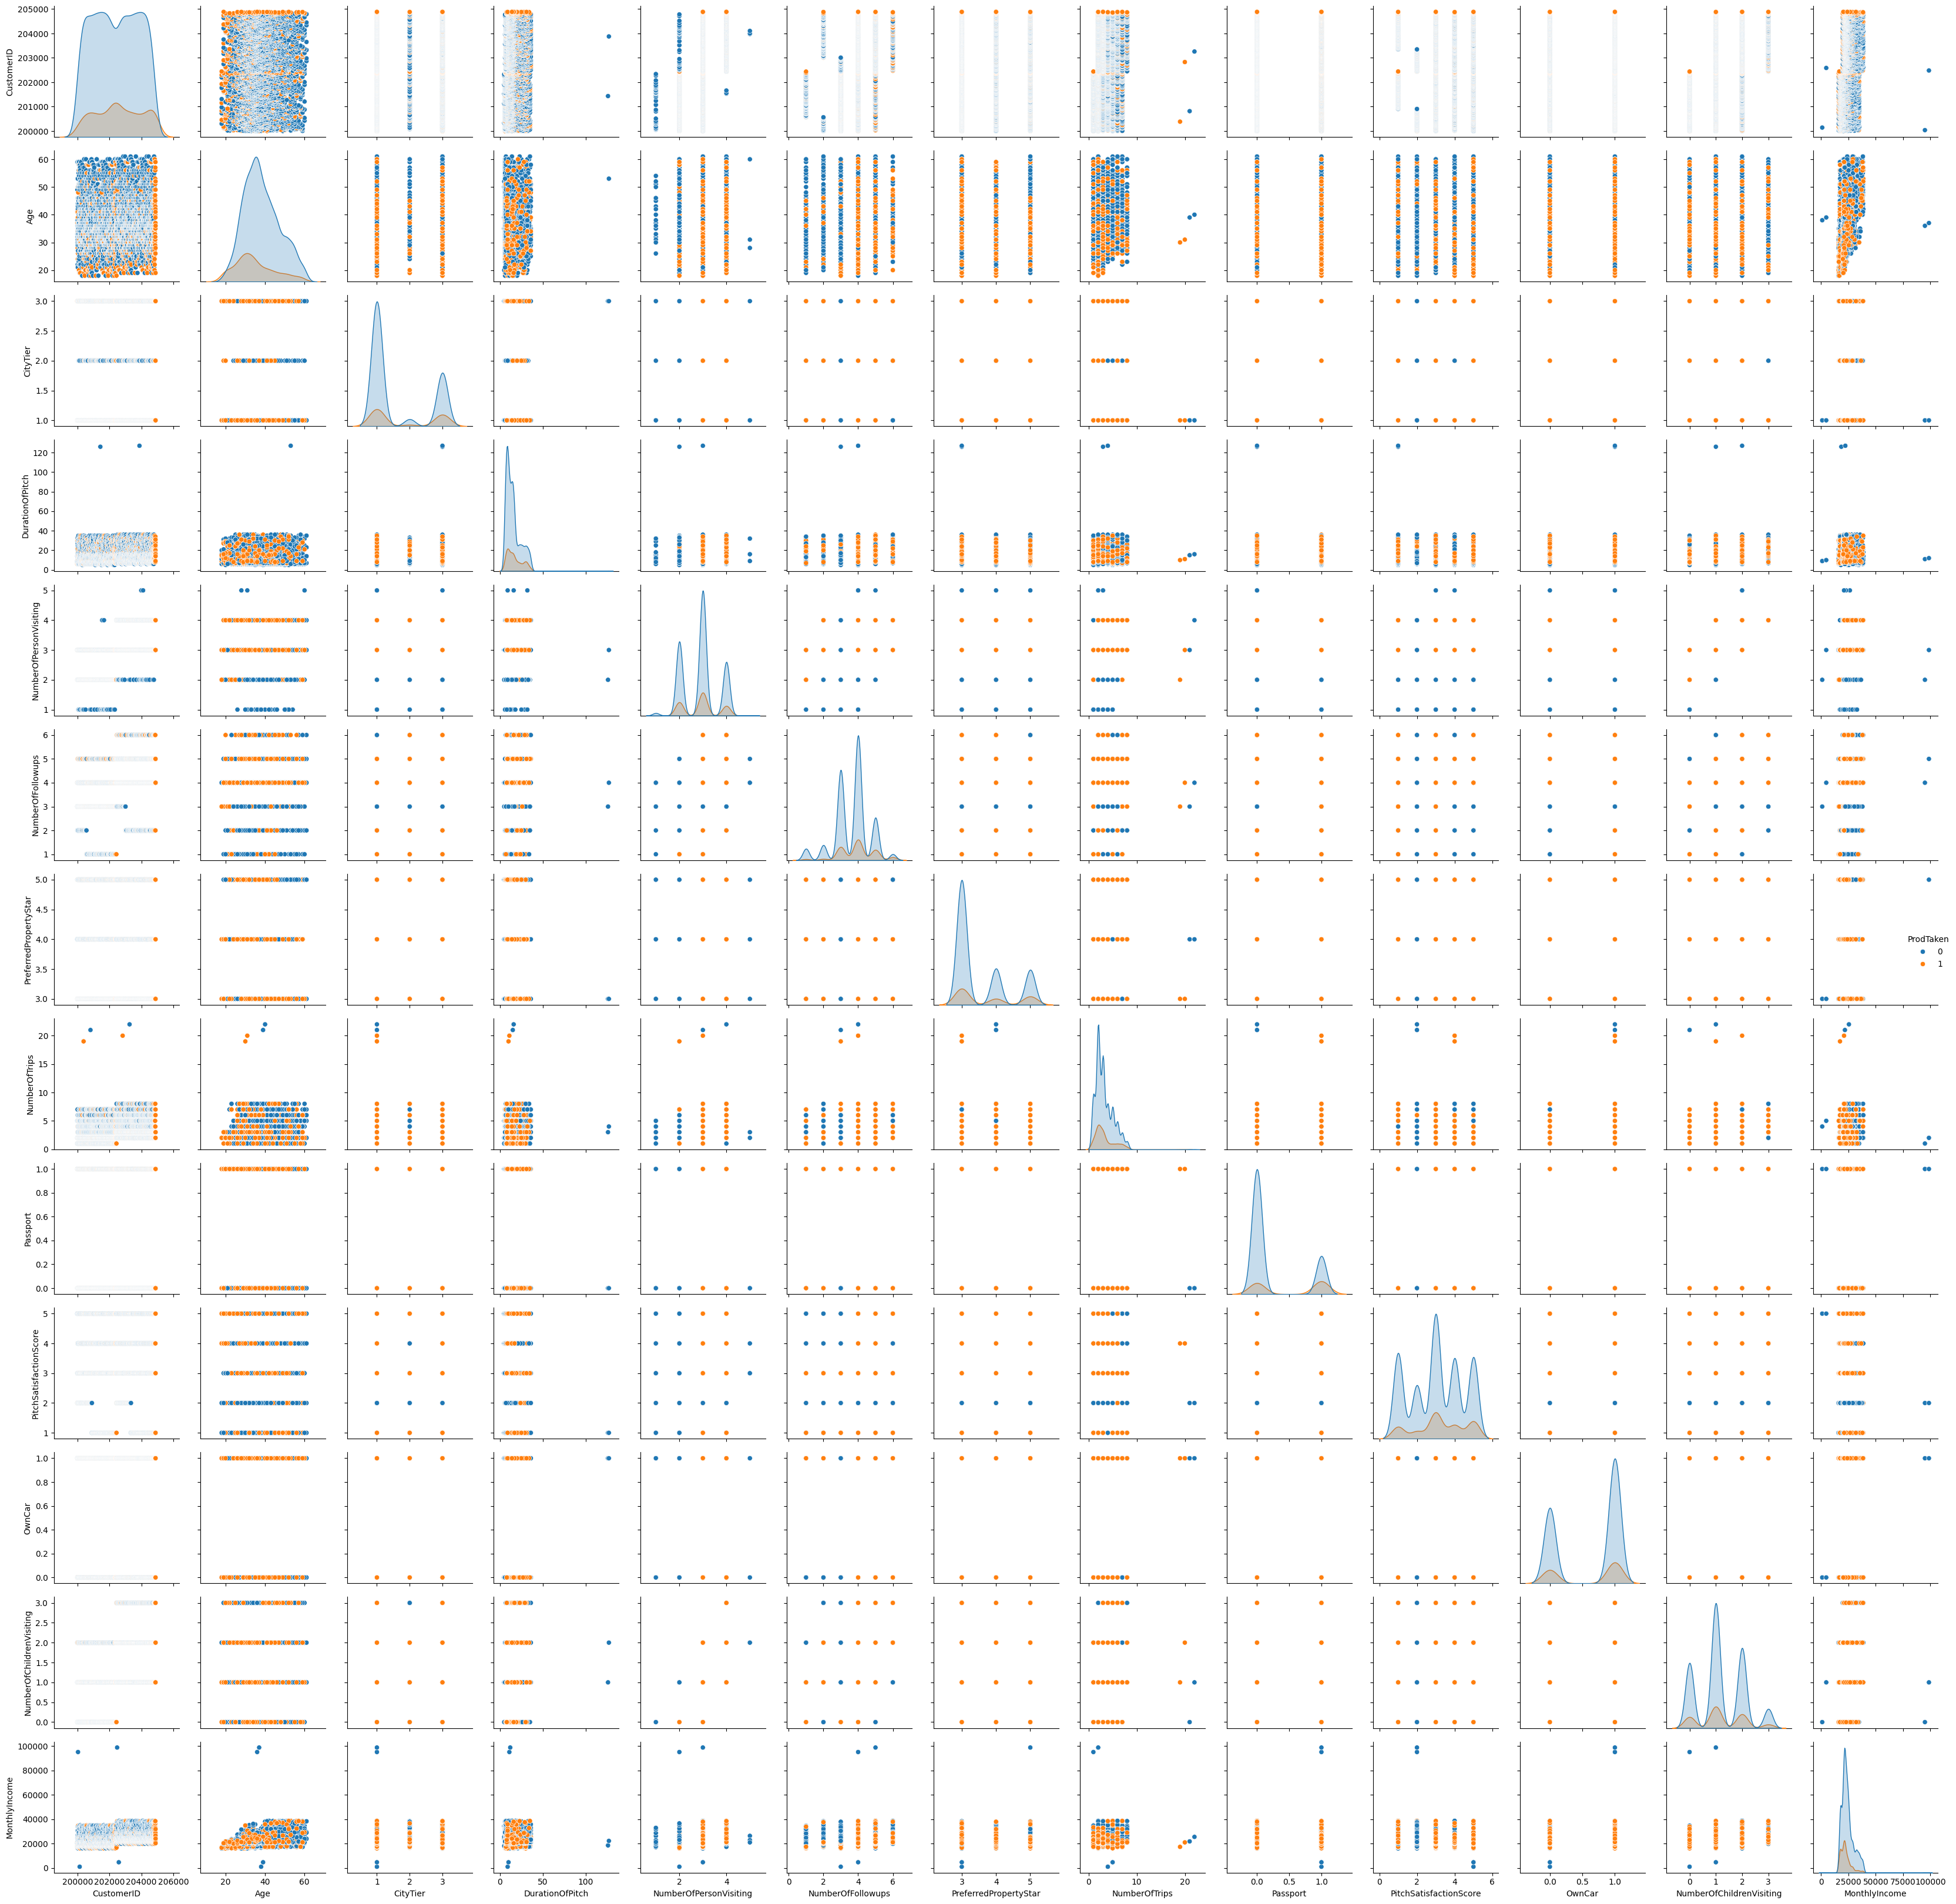

In [77]:
sns.pairplot(df, hue='ProdTaken')
plt.tight_layout()
plt.show()

### Numerical Columns Vs ProdTaken

In [78]:
num_cols.remove('CustomerID')

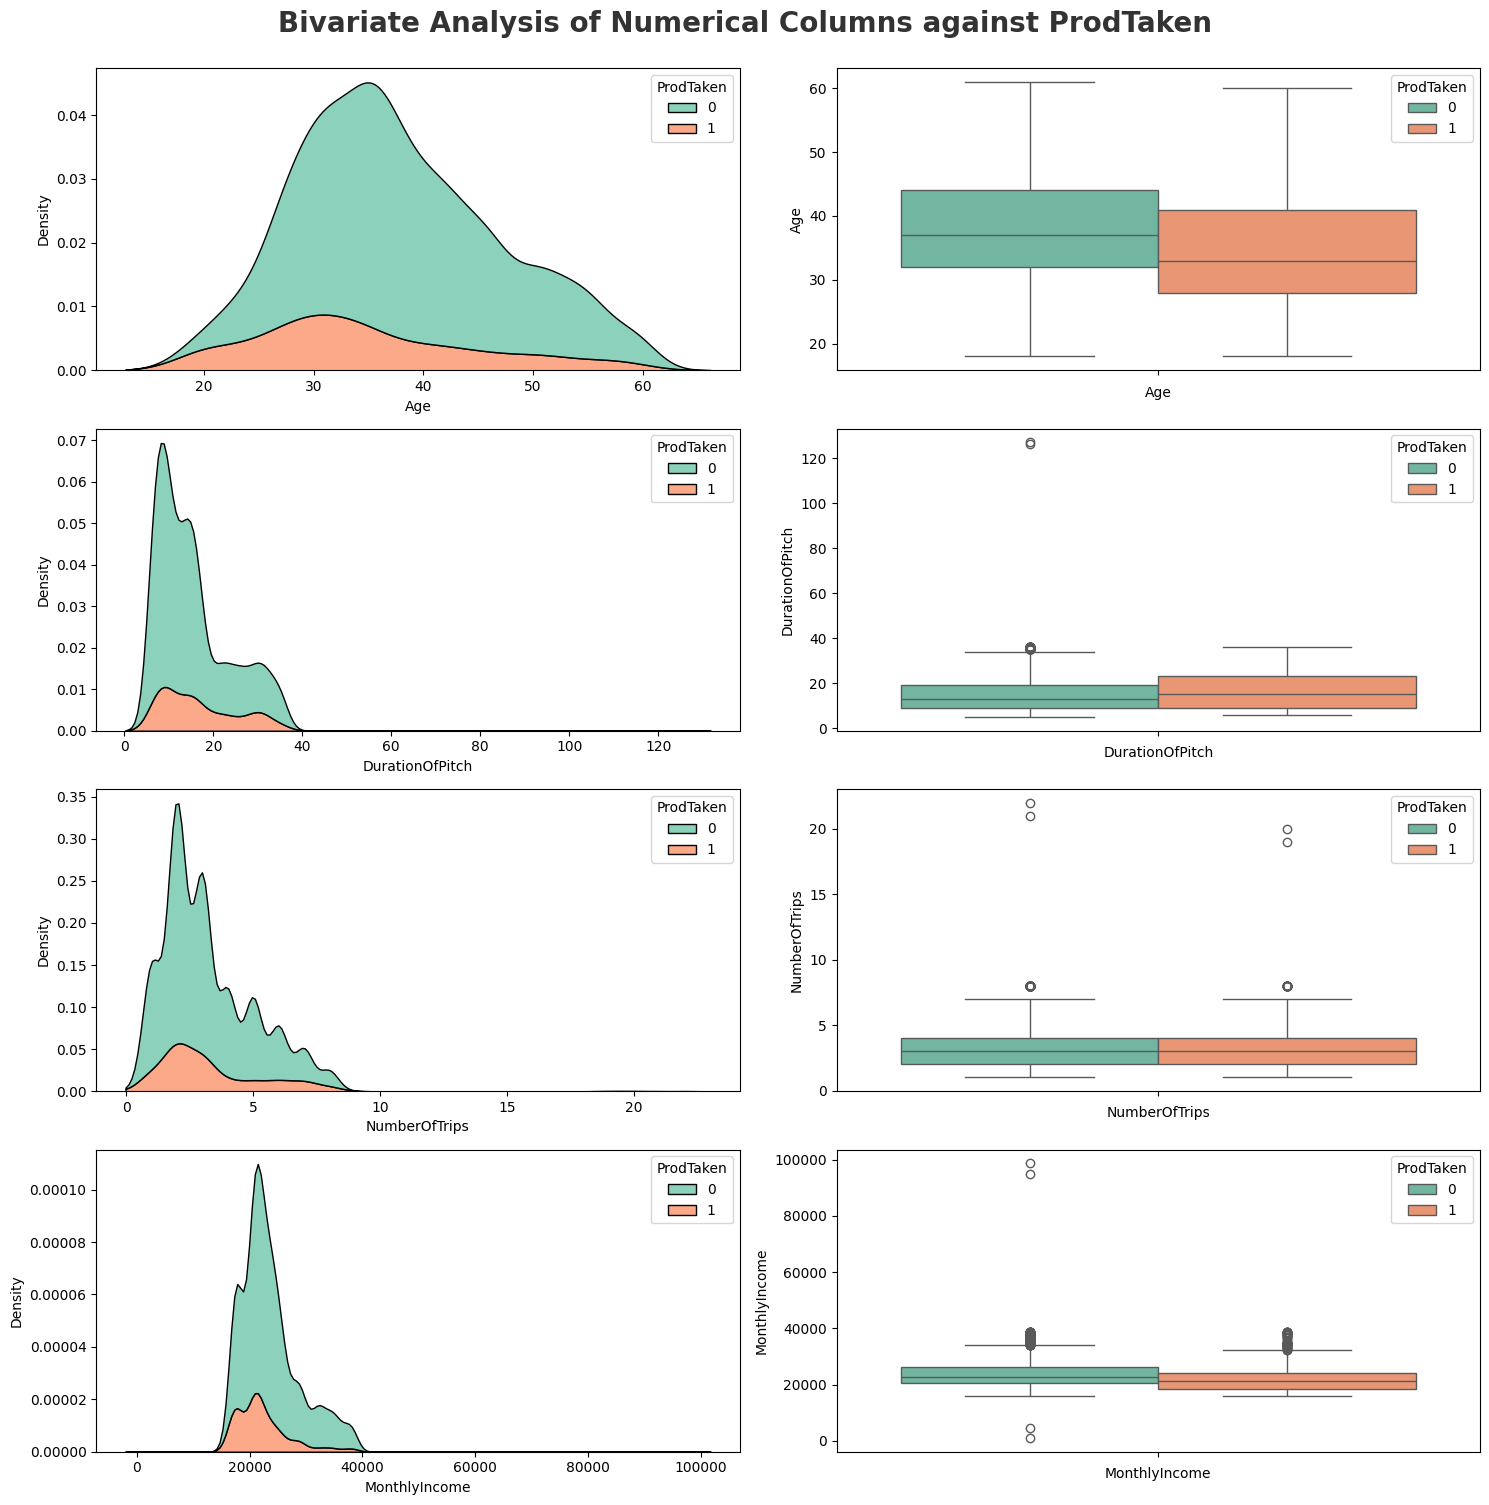

In [79]:
plt.figure(figsize=(15, 15))
plt.suptitle('Bivariate Analysis of Numerical Columns against ProdTaken', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

# Plot KDE dan Box plot untuk setiap kolom numerikal dengan target 'ProdTaken'
for i, col in enumerate(num_cols):
    plt.subplot(4, 2, 2*i+1)
    sns.kdeplot(data=df, x=col, hue='ProdTaken', fill=True, multiple='stack', palette='Set2')
    plt.xlabel(col)

    plt.subplot(4, 2, 2*i+2)
    sns.boxplot(data=df, hue='ProdTaken', y=col, palette='Set2')
    plt.xlabel(col)

plt.tight_layout()
plt.show()

Berdasarkan hasil visualisasi diatas dapat disimpulkan bahwa:
- Umur customer yang membeli paket perjalanan berada pada retang 29-40 tahun
- Duration of pitch yang dilakukan sales selama kurang dari 20 menit akan meningkatkan kemungkinan customer mengambil paket perjalanan
- Customer dengan pendapatan bulanan sekitar 15000-25000 berkemungkinan lebih tertarik untuk membeli paket perjalanan
Customer yang membeli paket perjalanan tidak melelati lebih dari 5 kali perjalanan dalam satu tahun

### Categorical Columns Vs ProdTaken

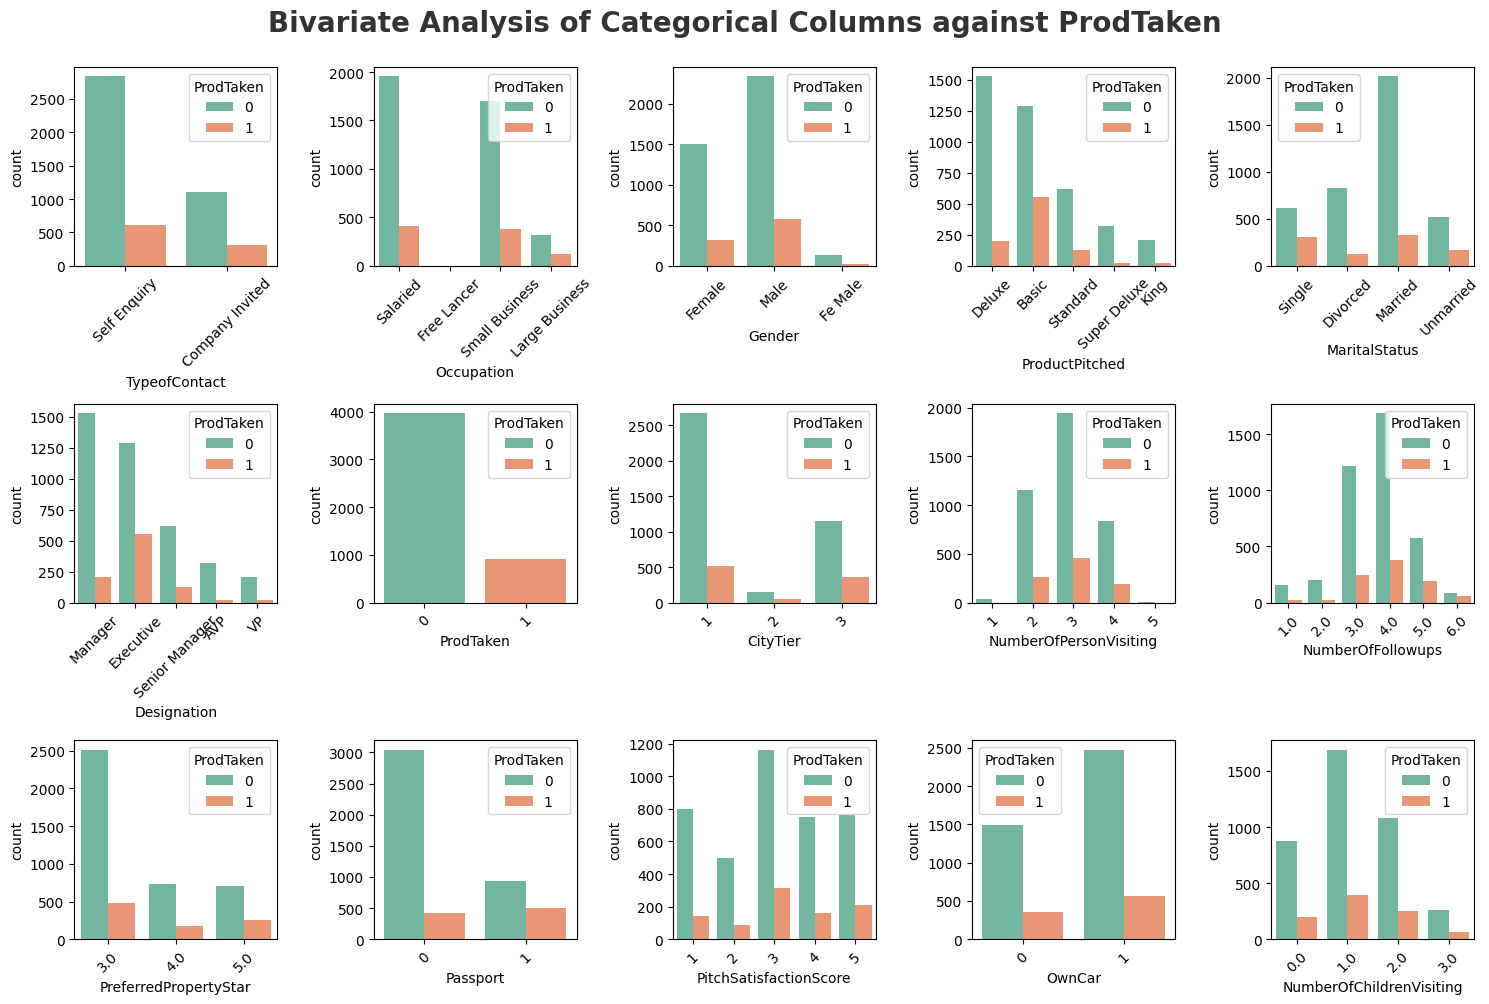

In [80]:
plt.figure(figsize=(15, 10))

for i in range(0, len(cat_cols)):
    plt.subplot(3, 5, i+1)
    sns.countplot(x=df[cat_cols[i]], hue=df['ProdTaken'], palette='Set2')
    plt.xticks(rotation=45)

plt.suptitle('Bivariate Analysis of Categorical Columns against ProdTaken', fontsize=20, fontweight='bold', alpha=0.8, y=1.)
plt.tight_layout()
plt.show()

Berdasarkan Visualisasi diatas dapat disimpulkan bahwa:
- Customer dengan tipe kontrak Self Enquiry membeli paket lebih banyak daripada customer dengan tipe kontrak Company Invited
- Customer yang berada di city tier 3 memiliki persentase pembelian paket lebih tinggi setelah ditawarkan oleh sales
- Customer dengan Occupation Salaried dan Small Business memiliki ketertarikan untuk membeli paket yang ditawarkan
- Customer dengan gender Male lebih banyak mengambil paket yang ditawarkan daripada female atau fe male
- Distribusi jumlah orang yang ikut dalam perjalanan dengan customer yang mengambil penawaran paket travel paling banyak adalah 3 orang
- Customner yang di-follow up antara 3-5 kali lebih banyak yang mengambil penawaran travel dibandingkan dengan yang ditawarkan kurang dari 3 kali atau lebih dari 5 kali
- Product basic yang ditawarkan oleh sales lebih banyak diambil daripada produk lainnya
- Customer yang menerima penawaran paket travel lebih banyak memilih property bintang tiga dibanding bintang empat dan lima
- Customer dengan status single atau unmarried lebih banyak menerima penawaran paket travel
- Customer yang memiliki passport memiliki persentase menerima penawaran paket travel lebih tinggi daripada yang tidak memiliki passport
- Customer yang memberikan score kepuasan >=3 lebih banyak membeli paket perjalanan.
- Customer yang memiliki mobil lebih banyak menerima penawaran paket travel
- Customer dengan jumlah anak 1 lebih banyak menerima penawaran paket travel
- Customer dengan jabatan Executive lebih banyak menerima penawaran paket travel

## Multivariate Analysis

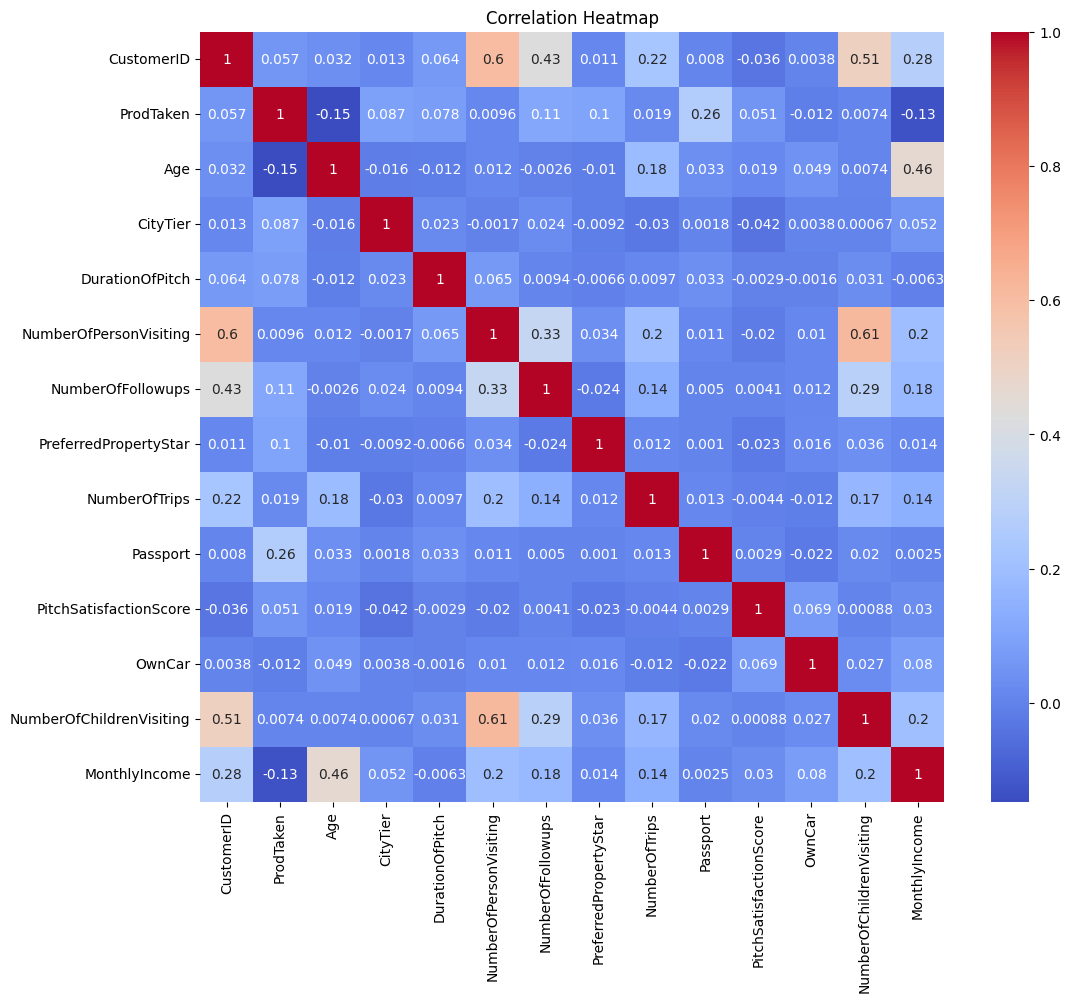

In [81]:
plt.figure(figsize=(12, 10))
sns.heatmap(df[nums].corr(), annot=True, cmap='coolwarm' )
plt.title('Correlation Heatmap')
plt.show()

## Business Insights

#### Product mana yang diminati oleh pelanggan?

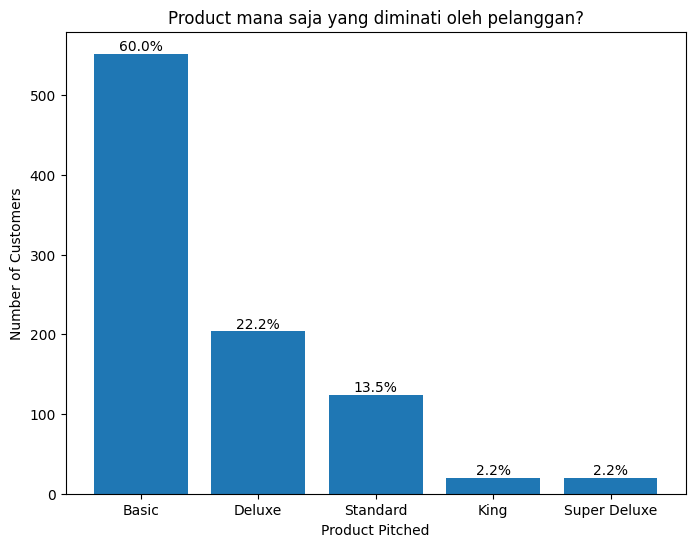

In [82]:
# Filter data where ProdTaken is True
df_prod_taken = df[df['ProdTaken'] == 1]

# Count the occurrences of each product
product_counts = df_prod_taken['ProductPitched'].value_counts()

# Create a bar chart
plt.figure(figsize=(8, 6))
bars = plt.bar(product_counts.index, product_counts.values, )
plt.xlabel('Product Pitched')
plt.ylabel('Number of Customers')
plt.title('Product mana saja yang diminati oleh pelanggan?')

# Add percentage labels to the bars
total_prod_taken = df_prod_taken.shape[0]
for bar in bars:
    height = bar.get_height()
    percentage = (height / total_prod_taken) * 100
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{percentage:.1f}%', ha='center', va='bottom')

plt.show()

Dari diagram batang dapat dilihat bahwa 60% paket yang diambil tawarannya adalah pake Basic, kemudian Deluxe, Standard, serta Super Deluxe dan King.

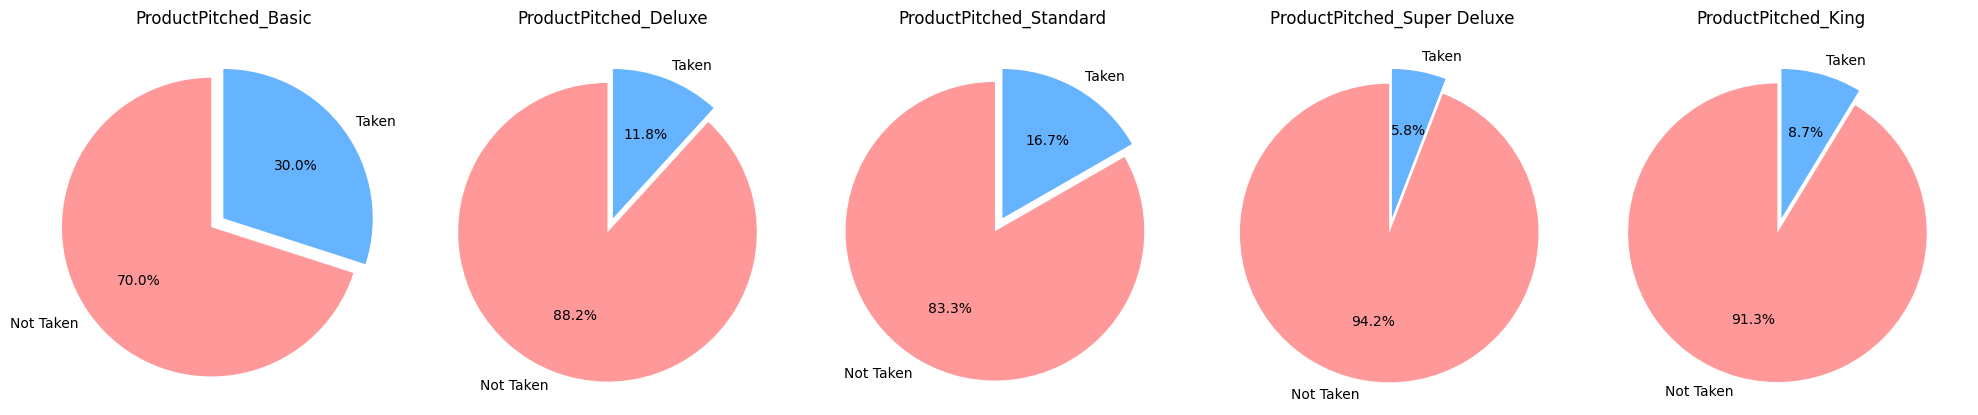

In [83]:
# Filter data for each product
product_pitches = ['Basic', 'Deluxe', 'Standard', 'Super Deluxe', 'King']

plt.figure(figsize=(20, 10))  # Adjust figure size for better visualization

for i, product in enumerate(product_pitches):
  # Subplot for each product
  plt.subplot(1, 5, i + 1)

  # Filter data for the current product
  product_data = df[df['ProductPitched'] == product]['ProdTaken'].value_counts() # Filter based on the 'ProductPitched column directly

  # Create pie chart
  labels = ['Not Taken', 'Taken']
  sizes = product_data.values
  colors = ['#ff9999', '#66b3ff']
  explode = (0.1, 0)

  plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, explode=explode, colors=colors)
  plt.title(f'ProductPitched_{product}')

plt.tight_layout()
plt.show()

Jika ditelaah lebih dalam pada setiap paketnya, tetap lebih banyak paket Basic yang diambil setelah ditawarkan, kemudian paket standar, paket deluxe, paket king, dan terakhir adalah paket super deluxe.

Dalam presentase ini, harga paket bukanlah masalah utama seseorang dalam mengambil paket setelah ditawarkan asalkan sales dapat dengan tepat memilih segment pelanggan yang sesuaikan untuk di-pitch.


#### Apakah jumlah followups dari sales mempengaruhi Customers untuk membeli paket perjalanan?

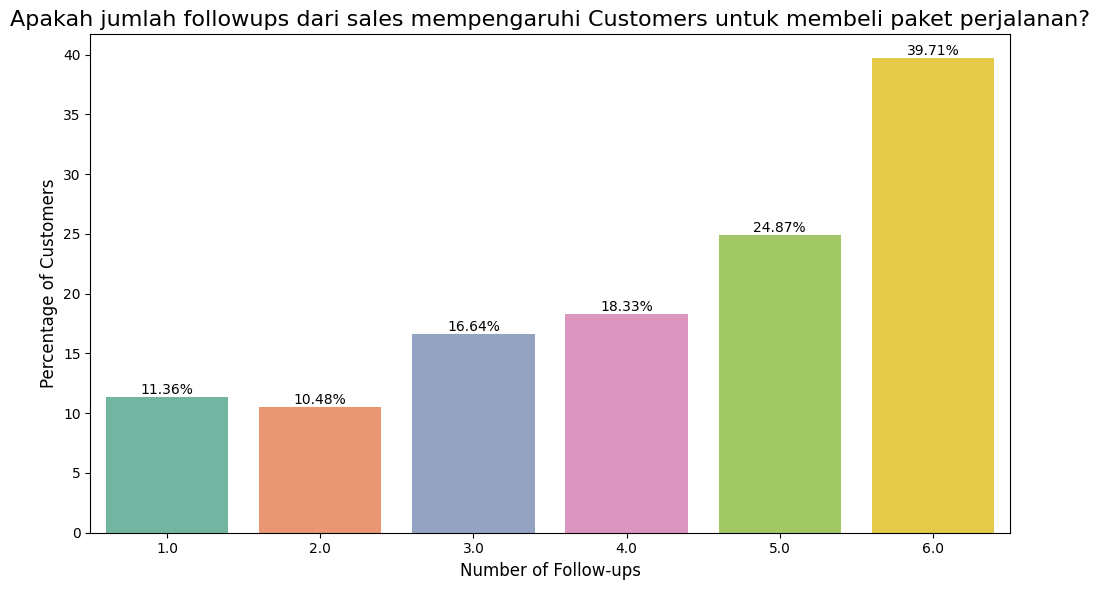

In [84]:
total_customers = df.groupby(['NumberOfFollowups', 'ProdTaken'])['CustomerID'].count().reset_index(name='TotalCustomers')

# Menghitung persentase pelanggan yang mengambil produk
percentage_customers = round(df.groupby(['NumberOfFollowups', 'ProdTaken'])['CustomerID'].count() / df.groupby(['NumberOfFollowups'])['CustomerID'].count() * 100, 2)
percentage_customers = percentage_customers.reset_index(name='PercCust')

# Menggabungkan kedua DataFrame
df_followups = total_customers.merge(percentage_customers, on=['NumberOfFollowups', 'ProdTaken'])
df_followups = df_followups[df_followups.ProdTaken == 1].reset_index(drop=True)

plt.figure(figsize=(10, 6))
sns.barplot(x='NumberOfFollowups', y='PercCust', data=df_followups, palette='Set2')

for idx, value in enumerate(df_followups['PercCust']):
    plt.text(idx, value, f"{value}%", ha='center', va='bottom', fontsize=10)

plt.xlabel('Number of Follow-ups', fontsize=12)
plt.ylabel('Percentage of Customers', fontsize=12)
plt.title('Apakah jumlah followups dari sales mempengaruhi Customers untuk membeli paket perjalanan?', fontsize=16)
plt.tight_layout()
plt.show()

Insight

adanya kecenderungan bahwa semakin banyak jumlah follow-up yang dilakukan oleh sales, semakin tinggi persentase pelanggan yang akhirnya memutuskan untuk membeli paket perjalanan. Presentase pelanggan yang membeli meningkat secara signifikan dari sekitar 11.36% pada satu follow-up menjadi 39.71% pada enam follow-up.

Hal ini menunjukkan adanya korelasi positif antara jumlah follow-up yang dilakukan oleh sales dengan keputusan pelanggan untuk membeli paket perjalanan. Semakin banyak interaksi atau tindak lanjut yang dilakukan, semakin tinggi kemungkinan pelanggan untuk mengambil keputusan pembelian. Hal ini dapat menjadi indikasi bahwa strategi follow-up yang lebih intens memiliki dampak yang positif terhadap peningkatan konversi pelanggan dalam membeli paket perjalanan.

#### Apakah Customer dari tiap City Tier yang berbeda memiliki ketertarikan dalam membeli paket perjalanan?

In [85]:
# Menghitung jumlah total pelanggan per tier kota yang membeli produk
df_citytier = df.groupby(['CityTier', 'ProdTaken'])['CustomerID'].count().reset_index(name='TotalCustomers').merge(df.groupby(['CityTier'])['CustomerID'].count(), on='CityTier')

# Menghitung persentase pelanggan per tier kota yang membeli produk
df_citytier = df_citytier[df_citytier.ProdTaken==1].reset_index(drop=True)
df_citytier['Persen']=round(df_citytier.TotalCustomers/df_citytier.CustomerID*100,2)
# Mengurutkan DataFrame berdasarkan persentase secara menurun
df_citytier = df_citytier.sort_values(by='Persen',ascending=False).reset_index(drop=True)
df_citytier

,CityTier,ProdTaken,TotalCustomers,CustomerID,Persen
0,3,1,354,1500,23.60
1,2,1,46,198,23.23
2,1,1,520,3190,16.30


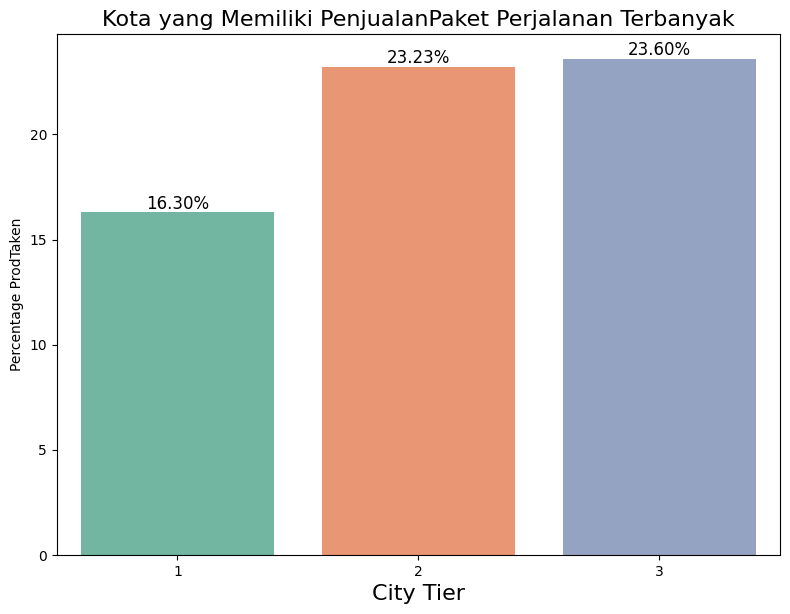

In [86]:
plt.figure(figsize=(8, 6))
sns.barplot(x='CityTier', y='Persen', data=df_citytier, palette='Set2')
plt.title('')
plt.xlabel('City Tier', fontsize=16)
plt.ylabel('Percentage ProdTaken')
data_bars = df_citytier.sort_values('Persen', ascending=True)['Persen'].values
for num, text in enumerate(data_bars):
    plt.text(num, text, f'{text:.2f}%', ha='center', va='bottom', fontsize=12)
plt.tight_layout()
plt.title('Kota yang Memiliki PenjualanPaket Perjalanan Terbanyak', fontsize=16)
plt.show()

Insight

tingkat konversi, atau persentase pelanggan yang telah mengambil produk, ternyata lebih tinggi di CityTier 3 (23.60%) dan CityTier 2 (23.23%) meskipun jumlah pelanggannya lebih sedikit dibandingkan dengan CityTier 1 (16.30%) yang memiliki jumlah pelanggan terbanyak. Hal ini menunjukkan bahwa meskipun jumlah pelanggan bisa lebih sedikit, tingkat konversi yang lebih tinggi di CityTier 3 dan 2 bisa menjadi peluang yang menarik dalam strategi pemasaran, mungkin dengan fokus lebih lanjut pada profil atau preferensi pelanggan di tingkat kota tersebut.

#### Apakah Customers yang memiliki passport lebih tertarik mengambil paket perjalanan?

In [87]:
df_passport = df.groupby(['Passport','ProdTaken']).CustomerID.count().reset_index()\
        .merge(df.groupby(['Passport']).CustomerID.count(),on='Passport')
df_passport['Persen']=round(df_passport.CustomerID_x/df_passport.CustomerID_y*100,2)
df_passport = df_passport[df_passport.ProdTaken==1].sort_values(by='Persen',ascending=False).reset_index(drop=True)
df_passport

,Passport,ProdTaken,CustomerID_x,CustomerID_y,Persen
0,1,1,494,1422,34.74
1,0,1,426,3466,12.29


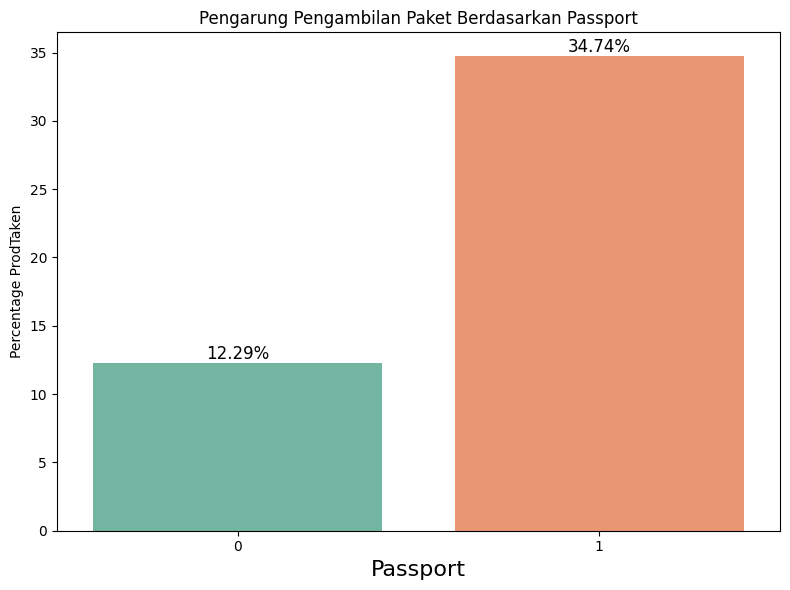

In [88]:
plt.figure(figsize=(8, 6))
sns.barplot(x='Passport', y='Persen', data=df_passport, palette='Set2')
plt.title('Pengarung Pengambilan Paket Berdasarkan Passport')
plt.xlabel('Passport', fontsize=16)
plt.ylabel('Percentage ProdTaken')
data_bars = df_passport.sort_values('Persen', ascending=True)['Persen'].values
for num, text in enumerate(data_bars):
    plt.text(num, text, f'{text:.2f}%', ha='center', va='bottom', fontsize=12)
plt.tight_layout()
plt.show()

Insight:

terdapat perbedaan signifikan dalam persentase pelanggan yang telah mengambil produk antara mereka yang memiliki paspor dan yang tidak memiliki. Proporsi pelanggan yang telah mengambil produk jauh lebih tinggi di antara mereka yang memiliki paspor (34.74%) dibandingkan dengan yang tidak memiliki (12.29%). Hal ini bisa menunjukkan adanya korelasi atau pengaruh antara kepemilikan paspor dengan keputusan pelanggan untuk mengambil produk. Namun, perlu analisis lebih lanjut untuk memahami apakah faktor kepemilikan paspor secara langsung memengaruhi keputusan tersebut atau terdapat faktor lain yang turut berperan dalam pengambilan keputusan pelanggan.

#### Segmentasi Umur dan Income apa yang mendominasi di setiap paket perjalanan?

In [89]:
df_eda = df.copy()

In [90]:
def segmentasi_income(income):
    if income <= 20346:
        segmentasi = 'Low Income'
    elif 20346 < income <= 25571:
        segmentasi = 'Middle Income'
    else:
        segmentasi = 'High Income'
    return segmentasi

# Menggunakan fungsi apply dengan lambda untuk membuat kolom baru 'segmentasi_income'
df_eda['segmentasi_income'] = df_eda['MonthlyIncome'].apply(segmentasi_income)
df_eda.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,...,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome,segmentasi_income
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,...,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0,Middle Income
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,...,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0,Low Income
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,...,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0,Low Income
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,...,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0,Low Income
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,...,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0,Low Income


posx and posy should be finite values
posx and posy should be finite values


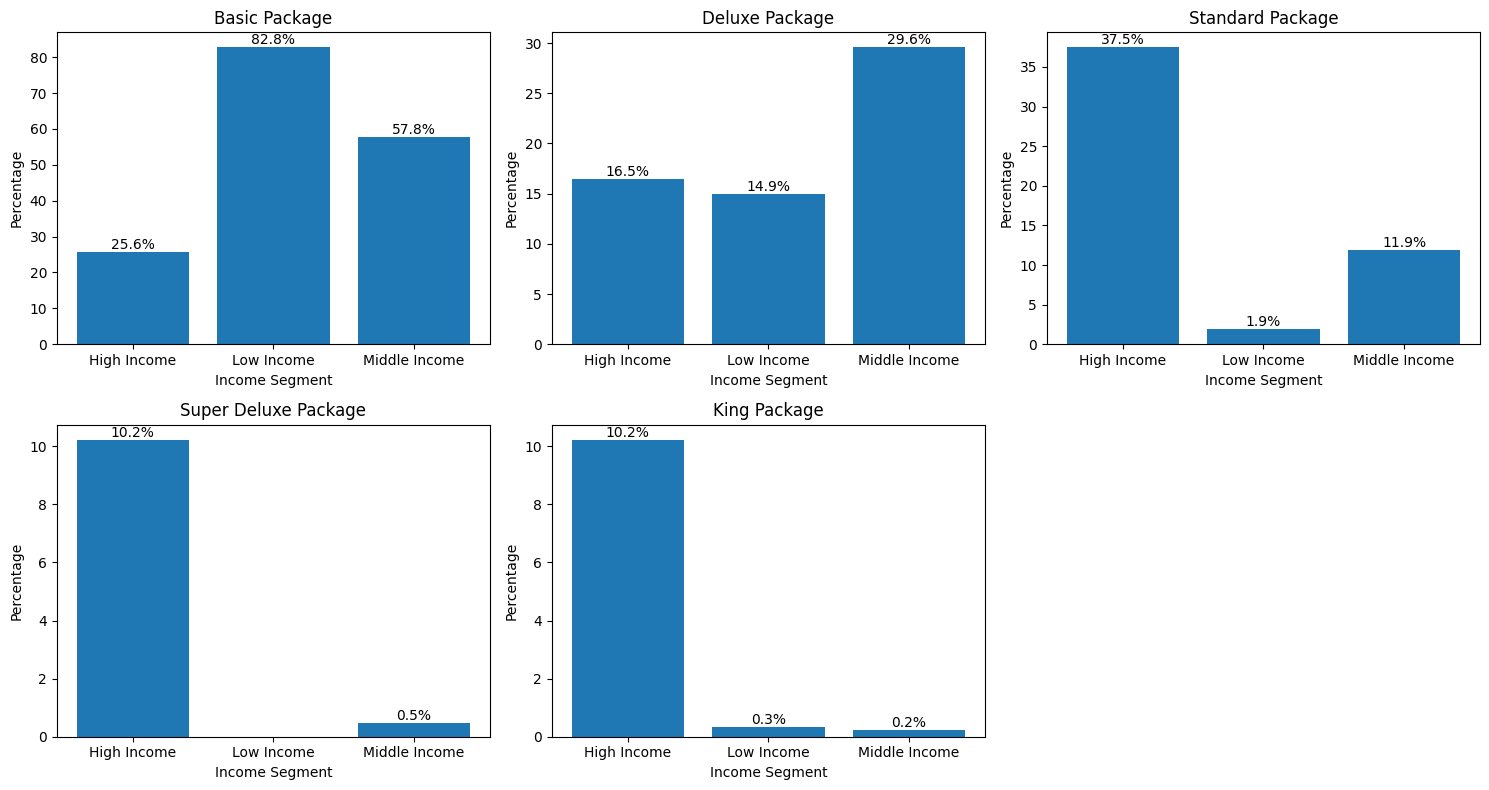

In [91]:
# Filter data where ProdTaken is 1 (customers who took the product)
df_prod_taken = df_eda[df_eda['ProdTaken'] == 1]

basic_counts = df_prod_taken[df_prod_taken['ProductPitched'] == 'Basic'].groupby('segmentasi_income').size()
deluxe_counts = df_prod_taken[df_prod_taken['ProductPitched'] == 'Deluxe'].groupby('segmentasi_income').size()
standard_counts = df_prod_taken[df_prod_taken['ProductPitched'] == 'Standard'].groupby('segmentasi_income').size()
super_deluxe_counts = df_prod_taken[df_prod_taken['ProductPitched'] == 'Super Deluxe'].groupby('segmentasi_income').size()
king_counts = df_prod_taken[df_prod_taken['ProductPitched'] == 'King'].groupby('segmentasi_income').size()

# Total customers per income segment for ProdTaken == 1
total_by_segment = df_prod_taken.groupby('segmentasi_income').size()

# Calculate percentages for each product and segment for ProdTaken == 1
basic_perc = (basic_counts / total_by_segment) * 100
deluxe_perc = (deluxe_counts / total_by_segment) * 100
standard_perc = (standard_counts / total_by_segment) * 100
super_deluxe_perc = (super_deluxe_counts / total_by_segment) * 100
king_perc = (king_counts / total_by_segment) * 100

# Set up plot dimensions
plt.figure(figsize=(15, 8))

# Bar chart for Basic Package
plt.subplot(2, 3, 1)
bars = plt.bar(basic_perc.index, basic_perc.values)
plt.xlabel('Income Segment')
plt.ylabel('Percentage')
plt.title('Basic Package')

# Add percentage labels
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.1f}%', ha='center', va='bottom')

# Bar chart for Deluxe Package
plt.subplot(2, 3, 2)
bars = plt.bar(deluxe_perc.index, deluxe_perc.values)
plt.xlabel('Income Segment')
plt.ylabel('Percentage')
plt.title('Deluxe Package')

# Add percentage labels
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.1f}%', ha='center', va='bottom')

# Bar chart for Standard Package
plt.subplot(2, 3, 3)
bars = plt.bar(standard_perc.index, standard_perc.values)
plt.xlabel('Income Segment')
plt.ylabel('Percentage')
plt.title('Standard Package')

# Add percentage labels
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.1f}%', ha='center', va='bottom')

# Bar chart for Super Deluxe Package
plt.subplot(2, 3, 4)
bars = plt.bar(super_deluxe_perc.index, super_deluxe_perc.values)
plt.xlabel('Income Segment')
plt.ylabel('Percentage')
plt.title('Super Deluxe Package')

# Add percentage labels
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.1f}%', ha='center', va='bottom')

# Bar chart for King Package
plt.subplot(2, 3, 5)
bars = plt.bar(king_perc.index, king_perc.values)
plt.xlabel('Income Segment')
plt.ylabel('Percentage')
plt.title('King Package')

# Add percentage labels
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.1f}%', ha='center', va='bottom')

plt.tight_layout()
plt.show()


Dilihat dari diagram batang, dapat diambil kesimpulan bahwa setiap paket memiliki segment pasar (khususnya dalam income) sesuai dengan harga paket tersebut. Paket termurah yaitu Basic didominasi oleh pelanggan dengan low income. Paket menengah yaitu Deluxe didominasi dengan pelanggan dengan middle income. Paket menengah ke termahal yaitu paket Standard, Super Deluxe, dan King didominasi oleh pelanggan dengan high income.

Dikarenakan paket baru yang akan ditawarkan merupakan paket yang berfokus pada kesehatan yaitu paket Wellness Tourism dan dengan biaya/tarif yang lebih mahal dibandingkan dengan paket King, sehingga ke depannya pemasaran paket paker Wellness Tourism bisa didasarkan oleh segmentasi income dari King Package.

In [92]:
def segmentasi_umur(age):
    if age <= 14:
        segmentasi = 'Kid'
    elif 15 < age <= 30:
        segmentasi = 'Young'
    elif 30 < age <= 50:
        segmentasi = 'Middle-Aged'
    else:
        segmentasi = 'Senior'
    return segmentasi

# Menggunakan fungsi apply dengan lambda untuk membuat kolom baru 'segmentasi_umur'
df_eda['segmentasi_umur'] = df_eda['Age'].apply(segmentasi_umur)
df_eda.head()


,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,...,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome,segmentasi_income,segmentasi_umur
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,...,Single,1.0,1,2,1,0.0,Manager,20993.0,Middle Income,Middle-Aged
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,...,Divorced,2.0,0,3,1,2.0,Manager,20130.0,Low Income,Middle-Aged
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,...,Single,7.0,1,3,0,0.0,Executive,17090.0,Low Income,Middle-Aged
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,...,Divorced,2.0,1,5,1,1.0,Executive,17909.0,Low Income,Middle-Aged
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,...,Divorced,1.0,0,5,1,0.0,Executive,18468.0,Low Income,Senior


posx and posy should be finite values
posx and posy should be finite values


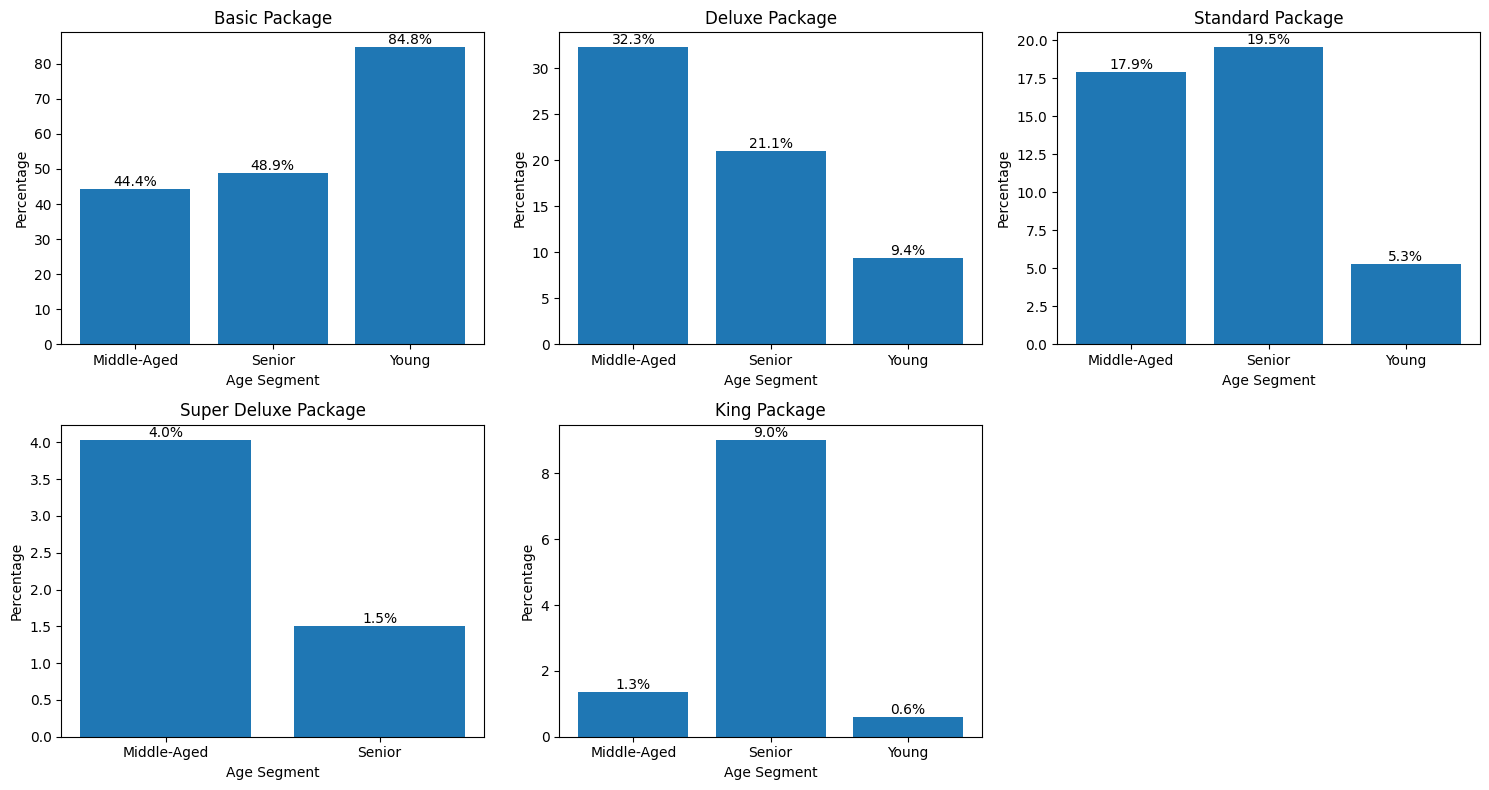

In [93]:
# Filter data where ProdTaken is 1 (customers who took the product)
df_prod_taken = df_eda[df_eda['ProdTaken'] == 1]

# Count the occurrences of each age segment for each product
basic_counts = df_prod_taken[df_prod_taken['ProductPitched'] == 'Basic'].groupby('segmentasi_umur').size()
deluxe_counts = df_prod_taken[df_prod_taken['ProductPitched'] == 'Deluxe'].groupby('segmentasi_umur').size()
standard_counts = df_prod_taken[df_prod_taken['ProductPitched'] == 'Standard'].groupby('segmentasi_umur').size()
super_deluxe_counts = df_prod_taken[df_prod_taken['ProductPitched'] == 'Super Deluxe'].groupby('segmentasi_umur').size()
king_counts = df_prod_taken[df_prod_taken['ProductPitched'] == 'King'].groupby('segmentasi_umur').size()

# Total customers per age segment
total_by_age_segment = df_prod_taken.groupby('segmentasi_umur').size()

# Calculate percentages for each product and segment
basic_perc = (basic_counts / total_by_age_segment) * 100
deluxe_perc = (deluxe_counts / total_by_age_segment) * 100
standard_perc = (standard_counts / total_by_age_segment) * 100
super_deluxe_perc = (super_deluxe_counts / total_by_age_segment) * 100
king_perc = (king_counts / total_by_age_segment) * 100

# Set up plot dimensions
plt.figure(figsize=(15, 8))

# Bar chart for Basic Package
plt.subplot(2, 3, 1)
bars = plt.bar(basic_perc.index, basic_perc.values)
plt.xlabel('Age Segment')
plt.ylabel('Percentage')
plt.title('Basic Package')

# Add percentage labels
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.1f}%', ha='center', va='bottom')

# Bar chart for Deluxe Package
plt.subplot(2, 3, 2)
bars = plt.bar(deluxe_perc.index, deluxe_perc.values)
plt.xlabel('Age Segment')
plt.ylabel('Percentage')
plt.title('Deluxe Package')

# Add percentage labels
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.1f}%', ha='center', va='bottom')

# Bar chart for Standard Package
plt.subplot(2, 3, 3)
bars = plt.bar(standard_perc.index, standard_perc.values)
plt.xlabel('Age Segment')
plt.ylabel('Percentage')
plt.title('Standard Package')

# Add percentage labels
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.1f}%', ha='center', va='bottom')

# Bar chart for Super Deluxe Package
plt.subplot(2, 3, 4)
bars = plt.bar(super_deluxe_perc.index, super_deluxe_perc.values)
plt.xlabel('Age Segment')
plt.ylabel('Percentage')
plt.title('Super Deluxe Package')

# Add percentage labels
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.1f}%', ha='center', va='bottom')

# Bar chart for King Package
plt.subplot(2, 3, 5)
bars = plt.bar(king_perc.index, king_perc.values)
plt.xlabel('Age Segment')
plt.ylabel('Percentage')
plt.title('King Package')

# Add percentage labels
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.1f}%', ha='center', va='bottom')

plt.tight_layout()
plt.show()


Dilihat dari diagram batang, paket Basic didominasi oleh anak muda dan orang tua, sedangkan paket Deluxe dan Super Deluxe didominasi oleh umur menengah, dan paket Standard dan Paket King didominasi oleh orang tua. Jika pemasaran paket Wellness Toursim mengacu pada paket King, maka segmentasi umur yang sesuai adalah orang tua berumur 50 tahun ke atas dengan high income.


# Feature Selection

## Numerical Features

In [94]:
from scipy import stats
import pandas as pd
import numpy as np

features = num_cols  # Assuming num_cols is defined elsewhere

results = []
selected_num_features = []

for feature in features:
    prod_taken_0 = df[df['ProdTaken'] == 0][feature].dropna()
    prod_taken_1 = df[df['ProdTaken'] == 1][feature].dropna()

    t_stat, p_value = stats.ttest_ind(prod_taken_0, prod_taken_1)

    if p_value < 0.05:
        hypothesis = "H1 diterima: Ada perbedaan signifikan"
        selected_num_features.append(feature)
    else:
        hypothesis = "H0 diterima: Tidak cukup bukti untuk menolak hipotesis nol"

    results.append({
        'Feature': feature,
        't-statistic': t_stat,
        'p-value': p_value,
        'Hypothesis Result': hypothesis
    })

# Membuat DataFrame dari hasil t-test
result = pd.DataFrame(results)
result = result.sort_values(by='p-value', ascending=True).reset_index(drop=True)
result

,Feature,t-statistic,p-value,Hypothesis Result
0,Age,10.162969,5.155096e-24,H1 diterima: Ada perbedaan signifikan
1,MonthlyIncome,8.984508,3.705260e-19,H1 diterima: Ada perbedaan signifikan
2,DurationOfPitch,-5.344214,9.516584e-08,H1 diterima: Ada perbedaan signifikan
3,NumberOfTrips,-1.302106,1.929435e-01,H0 diterima: Tidak cukup bukti untuk menolak h...


In [95]:
print(f'Kolom numerik yang terpilih: {selected_num_features}')

Kolom numerik yang terpilih: ['Age', 'DurationOfPitch', 'MonthlyIncome']


Dari hasil uji t-test

* Age: Hipotesis nol ditolak, menunjukkan perbedaan yang signifikan antara grup 'ProdTaken'. Ini menunjukkan bahwa usia dapat memainkan peran penting dalam keputusan pembelian.
* DurationOfPitch: Hipotesis nol ditolak, menunjukkan perbedaan yang signifikan antara grup 'ProdTaken'. Ini mengindikasikan bahwa durasi presentasi memiliki pengaruh yang signifikan terhadap keputusan pembelian.
* NumberOfTrips: Tidak cukup bukti untuk menolak hipotesis nol, yang berarti tidak ada perbedaan signifikan antara grup 'ProdTaken' terkait dengan jumlah perjalanan.
* MonthlyIncome: Hipotesis nol ditolak, menunjukkan perbedaan yang signifikan antara grup 'ProdTaken'. Ini menunjukkan bahwa pendapatan bulanan dapat memiliki pengaruh yang signifikan terhadap keputusan pembelian.

##### Categorical Features

In [96]:
import pandas as pd
from scipy.stats import chi2_contingency

cat = ['TypeofContact', 'Occupation', 'Gender', 'ProductPitched', 'MaritalStatus', 'Designation',
       'CityTier', 'NumberOfPersonVisiting', 'NumberOfFollowups', 'PreferredPropertyStar',
       'Passport', 'PitchSatisfactionScore', 'OwnCar', 'NumberOfChildrenVisiting']

columns = []
p_values = []
chi2_check = []
selected_cat_features = []

for i in cat:
    contingency_table = pd.crosstab(df['ProdTaken'], df[i])
    chi2, p_value, _, _ = chi2_contingency(contingency_table)

    columns.append(i)
    p_values.append(p_value)

    if p_value < 0.05:
        chi2_check.append('H1 diterima: Berkorelasi dengan target')
        selected_cat_features.append(i)
    else:
        chi2_check.append('H0 diterima: Tidak berkorelasi dengan target')

result = pd.DataFrame({
    'Column': columns,
    'p_value': p_values,
    'Hypothesis Result': chi2_check
})

result = result.sort_values('p_value', ascending=True).reset_index(drop=True)
result

,Column,p_value,Hypothesis Result
0,Passport,5.508530e-74,H1 diterima: Berkorelasi dengan target
1,ProductPitched,2.423597e-55,H1 diterima: Berkorelasi dengan target
2,Designation,2.423597e-55,H1 diterima: Berkorelasi dengan target
3,MaritalStatus,6.072003e-42,H1 diterima: Berkorelasi dengan target
4,NumberOfFollowups,1.429270e-15,H1 diterima: Berkorelasi dengan target
5,PreferredPropertyStar,2.459607e-11,H1 diterima: Berkorelasi dengan target
6,CityTier,5.063059e-09,H1 diterima: Berkorelasi dengan target
7,Occupation,2.233003e-07,H1 diterima: Berkorelasi dengan target
8,PitchSatisfactionScore,4.309857e-05,H1 diterima: Berkorelasi dengan target
9,TypeofContact,7.225114e-04,H1 diterima: Berkorelasi dengan target


In [97]:
print(f'Kolom kategori yang terpilih: {selected_cat_features}')

Kolom kategori yang terpilih: ['TypeofContact', 'Occupation', 'ProductPitched', 'MaritalStatus', 'Designation', 'CityTier', 'NumberOfPersonVisiting', 'NumberOfFollowups', 'PreferredPropertyStar', 'Passport', 'PitchSatisfactionScore']


Berdasarkan Visualisasi diatas dapat disimpulkan bahwa:
* Customer dengan tipe kontrak Self Enquiry membeli paket lebih banyak daripada customer dengan tipe kontrak Company Invited
* Customer yang berada di city tier 3 memiliki persentase pembelian paket lebih tinggi setelah ditawarkan oleh sales
* Customer dengan Occupation Salaried dan Small Business memiliki ketertarikan untuk membeli paket yang ditawarkan
* Customer dengan gender Male lebih banyak mengambil paket yang ditawarkan daripada female atau fe male
* Distribusi jumlah orang yang ikut dalam perjalanan dengan customer yang mengambil penawaran paket travel paling banyak adalah 3 orang
* Customner yang di-follow up antara 3-5 kali lebih banyak yang mengambil penawaran travel dibandingkan dengan yang ditawarkan kurang dari 3 kali atau lebih dari 5 kali
* Product basic yang ditawarkan oleh sales lebih banyak diambil daripada produk lainnya
* Customer yang menerima penawaran paket travel lebih banyak memilih property bintang tiga dibanding bintang empat dan lima
* Customer dengan status single atau unmarried lebih banyak menerima penawaran paket travel
* Customer yang memiliki passport memiliki persentase menerima penawaran paket travel lebih tinggi daripada yang tidak memiliki passport
* Customer yang memberikan score kepuasan >=3 lebih banyak membeli paket perjalanan.
* Customer yang memiliki mobil lebih banyak menerima penawaran paket travel
* Customer dengan jumlah anak 1 lebih banyak menerima penawaran paket travel
* Customer dengan jabatan Executive lebih banyak menerima penawaran paket travel

In [98]:
# feature yang dipilih berdasarkan T-test dan chi square serta EDA
selected_features = selected_cat_features + selected_num_features + ['ProdTaken']
df_selected = df[selected_features]

# Preprocessing

In [99]:
df_selected.shape

(4888, 15)

## Handling Missing Values

In [100]:
df_selected.isna().sum()

TypeofContact              25
Occupation                  0
ProductPitched              0
MaritalStatus               0
Designation                 0
CityTier                    0
NumberOfPersonVisiting      0
NumberOfFollowups          45
PreferredPropertyStar      26
Passport                    0
PitchSatisfactionScore      0
Age                       226
DurationOfPitch           251
MonthlyIncome             233
ProdTaken                   0
dtype: int64

In [101]:
# Mengisi missing values untuk kolom numerik dengan nilai median
num_cols = ['Age', 'MonthlyIncome', 'NumberOfFollowups', 'DurationOfPitch']
for col in num_cols:
    df_selected[col] = df_selected[col].fillna(df_selected[col].median())

# Mengisi missing values untuk kolom kategorikal dengan nilai mode
cat_cols = ['TypeofContact', 'PreferredPropertyStar']
for col in cat_cols:
    df_selected[col] = df_selected[col].fillna(df_selected[col].mode()[0])

## Handling Duplicates

In [102]:
df_selected.duplicated().sum()

596

In [103]:
df_selected.drop_duplicates(inplace=True)

## Handling Outliers

In [104]:
df_selected.head()

,TypeofContact,Occupation,ProductPitched,MaritalStatus,Designation,CityTier,NumberOfPersonVisiting,NumberOfFollowups,PreferredPropertyStar,Passport,PitchSatisfactionScore,Age,DurationOfPitch,MonthlyIncome,ProdTaken
0,Self Enquiry,Salaried,Deluxe,Single,Manager,3,3,3.0,3.0,1,2,41.0,6.0,20993.0,1
1,Company Invited,Salaried,Deluxe,Divorced,Manager,1,3,4.0,4.0,0,3,49.0,14.0,20130.0,0
2,Self Enquiry,Free Lancer,Basic,Single,Executive,1,3,4.0,3.0,1,3,37.0,8.0,17090.0,1
3,Company Invited,Salaried,Basic,Divorced,Executive,1,2,3.0,3.0,1,5,33.0,9.0,17909.0,0
4,Self Enquiry,Small Business,Basic,Divorced,Executive,1,2,3.0,4.0,0,5,36.0,8.0,18468.0,0


In [105]:
nums = ['Age', 'MonthlyIncome', 'NumberOfFollowups','DurationOfPitch']

Q1 = df_selected[nums].quantile(0.25)
Q3 = df_selected[nums].quantile(0.75)
IQR = Q3 - Q1
df_clean = df_selected[~((df_selected[nums] < (Q1 - 1.5 * IQR)) | (df_selected[nums] > (Q3 + 1.5 * IQR))).any(axis=1)]

row_before = df_selected.shape[0]
row_after = df_clean.shape[0]
num_dropped = row_before - row_after
print(f'Number of rows dropped: {num_dropped}')


Number of rows dropped: 687


## Encoding Value

In [106]:
df_clean['Designation'] = df_clean['Designation'].map({'Executive': 5, 'Manager': 1, 'Senior Manager': 2, 'AVP': 3, 'VP': 4})

df_clean = pd.concat([df_clean, pd.get_dummies(df_clean['ProductPitched'], prefix='ProductPitched', drop_first=True)], axis=1)
df_clean = pd.concat([df_clean, pd.get_dummies(df_clean['Occupation'], prefix='Occupation', drop_first=True)], axis=1)
df_clean = pd.concat([df_clean, pd.get_dummies(df_clean['MaritalStatus'], prefix='MaritalStatus', drop_first=True)], axis=1)
df_clean = pd.concat([df_clean, pd.get_dummies(df_clean['TypeofContact'], prefix='TypeofContact', drop_first=True)], axis=1)

df_clean.drop(['MaritalStatus','Occupation', 'ProductPitched', 'TypeofContact'], axis=1, inplace=True)

In [107]:
df_selected.head()

,TypeofContact,Occupation,ProductPitched,MaritalStatus,Designation,CityTier,NumberOfPersonVisiting,NumberOfFollowups,PreferredPropertyStar,Passport,PitchSatisfactionScore,Age,DurationOfPitch,MonthlyIncome,ProdTaken
0,Self Enquiry,Salaried,Deluxe,Single,Manager,3,3,3.0,3.0,1,2,41.0,6.0,20993.0,1
1,Company Invited,Salaried,Deluxe,Divorced,Manager,1,3,4.0,4.0,0,3,49.0,14.0,20130.0,0
2,Self Enquiry,Free Lancer,Basic,Single,Executive,1,3,4.0,3.0,1,3,37.0,8.0,17090.0,1
3,Company Invited,Salaried,Basic,Divorced,Executive,1,2,3.0,3.0,1,5,33.0,9.0,17909.0,0
4,Self Enquiry,Small Business,Basic,Divorced,Executive,1,2,3.0,4.0,0,5,36.0,8.0,18468.0,0


## scaling

In [108]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_clean_scl = df_clean.copy()
df_clean_scl[num_cols] = scaler.fit_transform(df_clean[num_cols])

## Splitting Data

In [109]:
from sklearn.model_selection import train_test_split

X = df_clean_scl.drop('ProdTaken', axis=1)
y = df_clean_scl['ProdTaken']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [110]:
print(f'Data Training: {X_train.shape[0]}')
print(f'Data Testing: {X_test.shape[0]}')

Data Training: 2884
Data Testing: 721


In [111]:
y_train.value_counts()

ProdTaken
0    2349
1     535
Name: count, dtype: int64

In [112]:
X_train_resampled, y_train_resampled = X_train.copy(), y_train.copy() 

# Modeling

In [113]:
print(f'Banyaknya data X_train: {X_train_resampled.shape[0]}')
print(f'Banyaknya data X_test: {X_test.shape[0]}')
print(f'Banyaknya data y_train: {y_train_resampled.shape[0]}')
print(f'Banyaknya data y_test: {y_test.shape[0]}')

Banyaknya data X_train: 2884
Banyaknya data X_test: 721
Banyaknya data y_train: 2884
Banyaknya data y_test: 721


In [114]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, classification_report

In [115]:
models = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'AdaBoost': AdaBoostClassifier(random_state=42),
    'XGBoost': XGBClassifier(random_state=42)
}

# Variabel untuk menyimpan model terbaik
f1_best = 0
best_model = None
best_model_name = None
y_pred_best = None  # Menyimpan prediksi terbaik untuk confusion matrix

# Membuat list untuk menyimpan hasil
results_list = []

# Looping untuk evaluasi setiap model
for name, model in models.items():
    model.fit(X_train_resampled, y_train_resampled)
    y_pred_test = model.predict(X_test)
    y_pred_train = model.predict(X_train_resampled)

    # Hitung metrik untuk train data
    accuracy_train = accuracy_score(y_train_resampled, y_pred_train)
    precision_train = precision_score(y_train_resampled, y_pred_train)
    recall_train = recall_score(y_train_resampled, y_pred_train)
    f1_train = f1_score(y_train_resampled, y_pred_train)
    roc_train = roc_auc_score(y_train_resampled, y_pred_train)

    # Hitung metrik untuk test data
    accuracy_test = accuracy_score(y_test, y_pred_test)
    precision_test = precision_score(y_test, y_pred_test)
    recall_test = recall_score(y_test, y_pred_test)
    f1_test = f1_score(y_test, y_pred_test)
    roc_test = roc_auc_score(y_test, y_pred_test)

    # Simpan hasil ke dalam list
    results_list.append({
        'Model': name,
        'Accuracy (train)': accuracy_train,
        'Precision (train)': precision_train,
        'Recall (train)': recall_train,
        'F1 Score (train)': f1_train,
        'ROC AUC (train)': roc_train,
        'Accuracy (Test)': accuracy_test,
        'Precision (Test)': precision_test,
        'Recall (Test)': recall_test,
        'F1 Score (Test)': f1_test,
        'ROC AUC (Test)': roc_test
    })


# Membuat DataFrame dari hasil evaluasi
results = pd.DataFrame(results_list)

# Tampilkan tabel hasil evaluasi
print("\nHasil Evaluasi Model:")
results



Hasil Evaluasi Model:


,Model,Accuracy (train),Precision (train),Recall (train),F1 Score (train),ROC AUC (train),Accuracy (Test),Precision (Test),Recall (Test),F1 Score (Test),ROC AUC (Test)
0,Logistic Regression,0.843967,0.685590,0.293458,0.410995,0.631403,0.828017,0.666667,0.301370,0.415094,0.631554
1,Decision Tree,1.000000,1.000000,1.000000,1.000000,1.000000,0.871012,0.675497,0.698630,0.686869,0.806706
2,Random Forest,1.000000,1.000000,1.000000,1.000000,1.000000,0.893204,0.863158,0.561644,0.680498,0.769518
3,Gradient Boosting,0.880721,0.849817,0.433645,0.574257,0.708095,0.850208,0.743590,0.397260,0.517857,0.681239
4,AdaBoost,0.838419,0.640816,0.293458,0.402564,0.627998,0.833564,0.709677,0.301370,0.423077,0.635033
5,XGBoost,0.998960,1.000000,0.994393,0.997188,0.997196,0.902913,0.816667,0.671233,0.736842,0.816486


In [116]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import precision_score, make_scorer, f1_score
from scipy.stats import uniform, randint

# Base estimator (Decision Tree)
base_estimator = DecisionTreeClassifier(random_state=42)

# Model AdaBoost dengan base estimator
best_model = AdaBoostClassifier(estimator=base_estimator, random_state=42)

# Parameter distributions untuk RandomizedSearchCV
param_dist = {
    'n_estimators': randint(50, 500),
    'learning_rate': uniform(0.01, 0.99),
    'estimator__max_depth': randint(1, 10),
    'estimator__min_samples_split': randint(2, 20),
    'estimator__min_samples_leaf': randint(1, 10),
    'algorithm': ['SAMME', 'SAMME.R']
}

# Inisialisasi RandomizedSearchCV dengan precision score
random_search = RandomizedSearchCV(
    estimator=best_model,
    param_distributions=param_dist,
    n_iter=50,
    scoring=make_scorer(f1_score),
    cv=5,
    verbose=1,
    random_state=42,
    n_jobs=-1
)

# Melakukan pencarian hyperparameter
random_search.fit(X_train_resampled, y_train_resampled)

# Menyimpan model dengan parameters terbaik
best_model = random_search.best_estimator_

# Evaluasi model pada test set
y_pred = best_model.predict(X_test)
test_precision = precision_score(y_test, y_pred)
print("\nTest Set Precision Score:", test_precision)

Fitting 5 folds for each of 50 candidates, totalling 250 fits

Test Set Precision Score: 0.8360655737704918


In [117]:
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score

# Lakukan cross-validation untuk model terbaik
print(f"Evaluating AdaBoost with Cross-Validation...")
cv_scores = cross_val_score(best_model, X_train_resampled, y_train_resampled, cv=5, scoring='precision')


print(f"precision: {cv_scores}")
print(f"mean score: {cv_scores.mean()}")


Evaluating AdaBoost with Cross-Validation...
precision: [0.83783784 0.80263158 0.86842105 0.71604938 0.75581395]
mean score: 0.7961507611242414


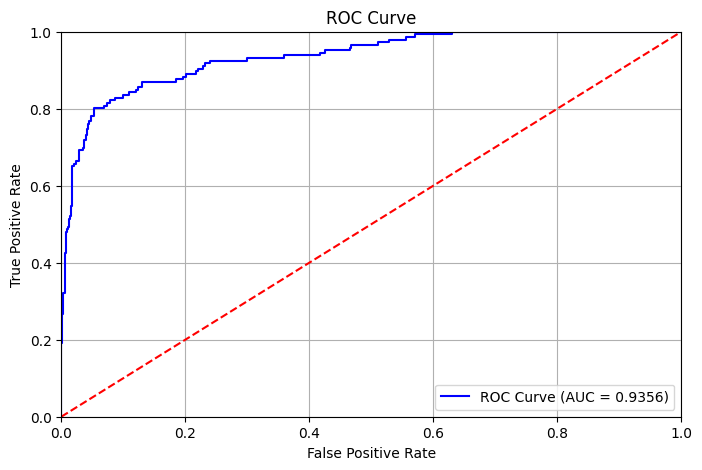

In [118]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# Ambil probabilitas kelas positif dari model terbaik
y_pred_proba_best = best_model.predict_proba(X_test)[:, 1]

# Hitung fpr, tpr, dan AUC
fpr, tpr, _ = roc_curve(y_test, y_pred_proba_best)
roc_auc = roc_auc_score(y_test, y_pred_proba_best)

# Visualisasi ROC Curve
plt.figure(figsize=(8, 5))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.4f})', color='blue')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Garis diagonal
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()


AdaBoost - train Precision: 0.7962
AdaBoost - Test Precision: 0.8361
AdaBoost - Test Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.97      0.95       575
           1       0.84      0.70      0.76       146

    accuracy                           0.91       721
   macro avg       0.88      0.83      0.85       721
weighted avg       0.91      0.91      0.91       721




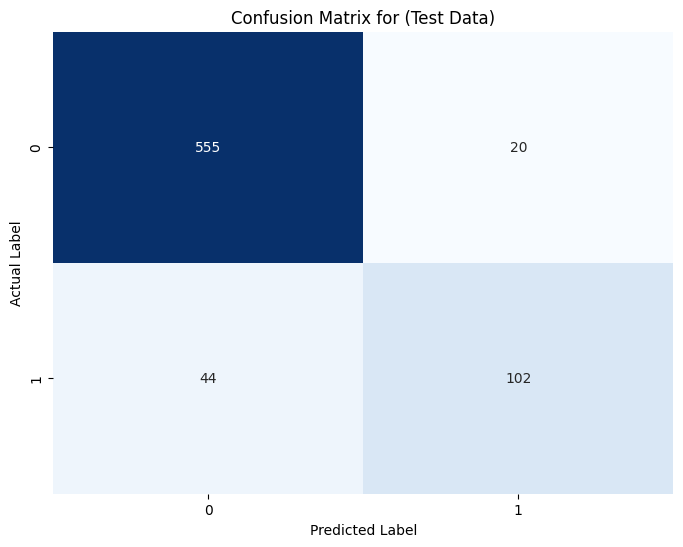

In [119]:
y_pred_test = best_model.predict(X_test)
y_pred_train = best_model.predict(X_train_resampled)


# Hitung metrik untuk data TRAIN

precision_train = cross_val_score(best_model, X_train_resampled, y_train_resampled, cv=5, scoring='precision')

# Hitung metrik untuk data TEST
precision_test = precision_score(y_test, y_pred_test)
classification_rep_test = classification_report(y_test, y_pred_test)


# Tampilkan hasil pada data TRAIN
print(f"AdaBoost - train Precision: {precision_train.mean():.4f}")

# Tampilkan hasil pada data TEST
print(f"AdaBoost - Test Precision: {precision_test:.4f}")
print(f"AdaBoost - Test Classification Report:\n{classification_rep_test}\n")

# Plot Confusion Matrix untuk data TEST
cm_best = confusion_matrix(y_test, y_pred_test)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_best, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=[0, 1], yticklabels=[0, 1])
plt.title(f'Confusion Matrix for (Test Data)')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

# Feature Importance

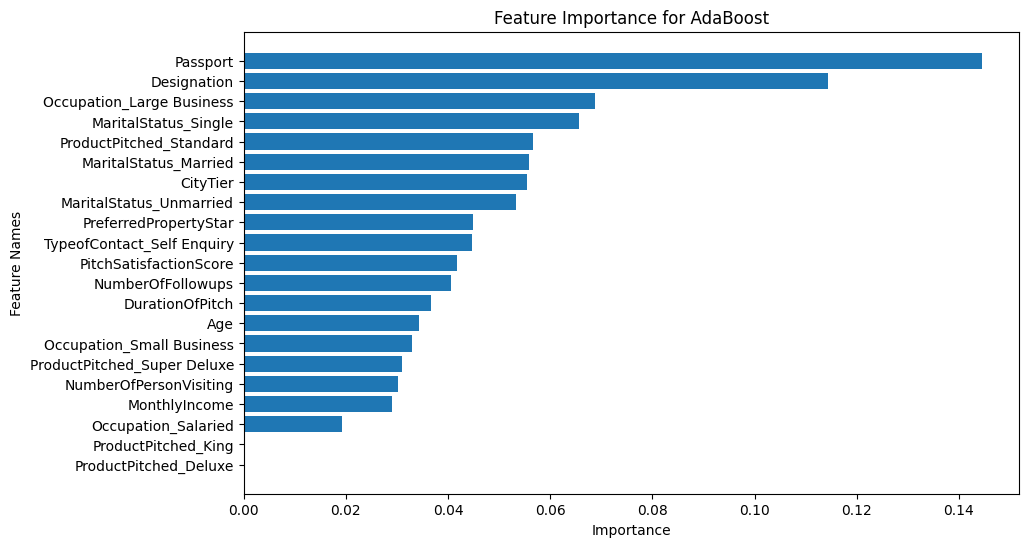

In [120]:
importances = model.feature_importances_

# Sort feature importances in descending order
indices = np.argsort(importances)
feature_names = X_train_resampled.columns

# Plot the feature importances with feature names on the Y-axis
plt.figure(figsize=(10, 6))
plt.title('Feature Importance for AdaBoost')
plt.barh(range(len(importances)), importances[indices], align='center')
plt.yticks(range(len(importances)), np.array(feature_names)[indices])
plt.xlabel('Importance')
plt.ylabel('Feature Names')
plt.show()

Berdasarkan hasil modeling dan melihat feature importance nya, passport menjadi kunci utama dalam menentukan apakah customer tersebut akan melakukan pembelian terhadap paket yang ditawarkan,designation, marital status terutama yang berstatus single/unmarried, tier city, dan posisi customer tersebut dalam pekerjaan juga menjadi hal yang penting untuk dipertimbangkan.

# Business Insight

Customer yang memiliki **passport**, memiliki **posisi/jabatan executive**, atau **pembisnis skala besar** serta berstatus **single/unmarried** memiliki potensi untuk melakukan pembelian terhadap paket yg akan ditawarkan (Wellness Tourism Package).

Tidak hanya itu, customer yang tinggal di perkotaan besar memiliki persentase lebih besar untuk melakukan pembelian dibandingkan dengan kota kota lainnya.



# Business Recommendation

* Fokuskan penawaran terhadap customer yang memiliki passport
* Mengadakan Payday Sale, diharapkan dapat menarik perhatian customer dengan posisi executive dan meningkatkan penjualan secara signifikan pada periode gaji
* Memberikan harga khusus untuk pembelian secara massive (untuk menarik customer yang memiliki bisnis berskala besar, sehingga dapat mengajak keluarga ataupun para staff-nya)
* Memberikan perlakuan khusus kepada pelanggan yang berstatus single/unmarried dapat menjadi strategi yang efektif untuk menarik minat mereka, mengingat pelanggan dengan status ini cenderung lebih responsif terhadap penawaran yang diberikan
contoh: memberikan merchandise untuk customer single/unmarried yang melakukan pembelian paket pada hari valentine
* Perbanyak promosi di daerah dengan tingkat perkembangan yang lebih tinggi

